# ASSIGNMENT 1

### Group 3

#### Group members (name, person code, matricola):
    - Alessandro Barbero, 10536528, 966484
    - Luca Cattaneo, 10521219, 962594
    - Marco De Donno, 10530768, 953353
    - Jacopo Elia Pometto, 10521596, 963667

In [1]:
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegression
from scipy.stats import median_abs_deviation
from sklearn.naive_bayes import GaussianNB
from plotly.subplots import make_subplots
from urllib.request import urlopen
from pathlib import Path
from scipy import stats

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
import json

pio.renderers.default = "png"

## CLEANING

### Taxi Dataset

We start from the taxi dataset:

In [2]:
taxi = pd.read_csv(Path("Chicago_Taxi_Trips_2020_10percent.csv")) #this open the csv dataset considering the path

taxi.columns = [c.replace(' ', '_') for c in taxi.columns]  #replaces spaces in columns with underscores

taxi.shape

(342292, 23)

#### Data preparation - Time

In [3]:
#This lines recognises AM/PM difference
taxi.Trip_Start_Timestamp = pd.to_datetime(taxi.Trip_Start_Timestamp, format='%m/%d/%Y %I:%M:%S %p')
taxi.Trip_End_Timestamp = pd.to_datetime(taxi.Trip_End_Timestamp, format='%m/%d/%Y %I:%M:%S %p')

In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342292 entries, 0 to 342291
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip_ID                     342292 non-null  object        
 1   Taxi_ID                     342274 non-null  object        
 2   Trip_Start_Timestamp        342292 non-null  datetime64[ns]
 3   Trip_End_Timestamp          342238 non-null  datetime64[ns]
 4   Trip_Seconds                342158 non-null  float64       
 5   Trip_Miles                  342291 non-null  float64       
 6   Pickup_Census_Tract         174085 non-null  float64       
 7   Dropoff_Census_Tract        172971 non-null  float64       
 8   Pickup_Community_Area       318310 non-null  float64       
 9   Dropoff_Community_Area      310733 non-null  float64       
 10  Fare                        342258 non-null  float64       
 11  Tips                        342258 non-

In [5]:
taxi.head()

Trip_ID  \
0  7fa9327d2a62e0f1f9eac0f5a4ca0bb5338c22b2   
1  493354c5b05333aeeb05055a4914c5d38bacef60   
2  450f3aa6b31aa37cbb7c972f92a9ba31ab506c79   
3  39100cdb94f6da6b54f71f1d1cdc2ba330f97e09   
4  36bbb8cf2622b3ce7dde8f6bbaacc903a8403333   

                                             Taxi_ID Trip_Start_Timestamp  \
0  03906d62f91d139ab93f74f50d1b208805b7fbb61e8d1e...           2020-01-01   
1  ca885a78545e9a44a5f365164cfbaca32fee95082b0d4f...           2020-01-01   
2  81bc2020b8536280419b3e152ad07a0c5b9f53cbb503a0...           2020-01-01   
3  a548c63608ec50e02a2311a0b6b1b2274995e3637ccb4c...           2020-01-01   
4  33164e16dd29b1c58cd15cce31df4bfcb75d9903cb66de...           2020-01-01   

   Trip_End_Timestamp  Trip_Seconds  Trip_Miles  Pickup_Census_Tract  \
0 2020-01-01 00:00:00         178.0        0.48         1.703132e+10   
1 2020-01-01 00:30:00        1200.0        5.30                  NaN   
2 2020-01-01 00:15:00         540.0        1.70         1.703108e+10   
3 2020-01-01 00:15:00         419.0        0.98         1.703128e+10   
4 2020-01-01 00:30:00        1800.0        1.50         1.703128e+10   

   Dropoff_Census_Tract  Pickup_Community_Area  Dropoff_Community_Area  ...  \
0          1.703132e+10                   32.0                    32.0  ...   
1                   NaN                    8.0                    23.0  ...   
2          1.703108e+10                    8.0                     8.0  ...   
3          1.703184e+10                   28.0                    32.0  ...   
4          1.703132e+10                   28.0                    32.0  ...   

   Extras  Trip_Total  Payment_Type                    Company  \
0     3.0       10.00   Credit Card                  Flash Cab   
1     0.0       20.10   Credit Card  Star North Management LLC   
2     0.0        8.00          Cash  Taxi Affiliation Services   
3     1.0        7.50          Cash               City Service   
4     1.0       15.25          Cash           Medallion Leasin   

   Pickup_Centroid_Latitude Pickup_Centroid_Longitude  \
0                 41.877406                -87.621972   
1                 41.899602                -87.633308   
2                 41.907492                -87.635760   
3                 41.885300                -87.642808   
4                 41.885300                -87.642808   

               Pickup_Centroid_Location  Dropoff_Centroid_Latitude  \
0  POINT (-87.6219716519 41.8774061234)                  41.884987   
1   POINT (-87.6333080367 41.899602111)                  41.900070   
2  POINT (-87.6357600901 41.9074919303)                  41.892073   
3  POINT (-87.6428084655 41.8853000224)                  41.880994   
4  POINT (-87.6428084655 41.8853000224)                  41.884987   

   Dropoff_Centroid_Longitude            Dropoff_Centroid__Location  
0                  -87.620993  POINT (-87.6209929134 41.8849871918)  
1                  -87.720918  POINT (-87.7209182385 41.9000696026)  
2                  -87.628874  POINT (-87.6288741572 41.8920726347)  
3                  -87.632746  POINT (-87.6327464887 41.8809944707)  
4                  -87.620993  POINT (-87.6209929134 41.8849871918)  

[5 rows x 23 columns]

#### Data Preparation - Missing Values

We firstly check if there are totally empty rows. In that case we remove them.

In [6]:
taxi.dropna(how='all').shape

(342292, 23)

In [7]:
#This line excludes trips that End before Starting (90 trips)
taxi = taxi[taxi.Trip_End_Timestamp >= taxi.Trip_Start_Timestamp]
taxi.shape

(342202, 23)

Turns out that the all rows have at least one valid value.

We count the number of missing values for each columns.

In [8]:
taxi.isnull().sum()

Trip_ID                            0
Taxi_ID                           18
Trip_Start_Timestamp               0
Trip_End_Timestamp                 0
Trip_Seconds                      44
Trip_Miles                         1
Pickup_Census_Tract           168144
Dropoff_Census_Tract          169235
Pickup_Community_Area          23971
Dropoff_Community_Area         31498
Fare                              34
Tips                              34
Tolls                             34
Extras                            34
Trip_Total                        34
Payment_Type                       0
Company                            0
Pickup_Centroid_Latitude       23919
Pickup_Centroid_Longitude      23919
Pickup_Centroid_Location       23919
Dropoff_Centroid_Latitude      30855
Dropoff_Centroid_Longitude     30855
Dropoff_Centroid__Location     30855
dtype: int64

We see that about half of the Census Tracts are missing because of the privacy limitations.

We drop the trips with missing pickup and dropoff community areas because we want to focus our analysis on the trips inside Chicago.

In [9]:
taxi = taxi[taxi['Pickup_Community_Area'].notna()]
taxi = taxi[taxi['Dropoff_Community_Area'].notna()]

#### Statistics

The following function helps us to compute some statistics useful to analyze our data.

In [10]:
def statistics(variable):
    stats = {}
    stats['mean'] = variable.mean()
    stats['std'] = variable.std()
    stats['max'] = variable.max()
    stats['min'] = variable.min()
    stats['median'] = np.nanmedian(variable)  
    stats['1%'] = np.nanpercentile(variable, 1)
    stats['5%'] = np.nanpercentile(variable, 5)
    stats['10%'] = np.nanpercentile(variable,10) 
    stats['17,5%'] = np.nanpercentile(variable,17.5)
    stats['25%'] = np.nanpercentile(variable,25)
    stats['75%'] = np.nanpercentile(variable,75)
    stats['95%'] = np.nanpercentile(variable, 95)
    stats['99%'] = np.nanpercentile(variable,99)
    stats['99.5%'] = np.nanpercentile(variable,99.5) 
    stats['99.9%'] = np.nanpercentile(variable,99.9)
    stats['mad'] = median_abs_deviation(variable, nan_policy = 'omit')
    return stats

##### Trip Seconds

In [11]:
stat_Trip_Seconds = statistics(taxi.Trip_Seconds)
stat_Trip_Seconds

{'mean': 810.0526241839249,
 'std': 1555.1510437781708,
 'max': 85320.0,
 'min': 0.0,
 'median': 540.0,
 '1%': 0.0,
 '5%': 120.0,
 '10%': 184.0,
 '17,5%': 279.0,
 '25%': 342.0,
 '75%': 960.0,
 '95%': 2168.0,
 '99%': 3433.6300000000047,
 '99.5%': 4081.8150000000023,
 '99.9%': 11022.408000000753,
 'mad': 250.0}

Max value of the Trip duration (in seconds) is 85320 seconds, or 23.7h. It does not make any sense and we think that is an outlier.

For this column we consider a Winsorizing and Trimming technique:
* We discard values above 99.5th percentiles since they are over 73 min.
* We do not consider values below 5th percentiles because trips below 1 min are meaningless. We chose 1 min winsorizing because within the airport several very       short trips (<3min) happen.  

In [12]:
#Winsorizing of values below the 5th percentile
taxi.Trip_Seconds = taxi.Trip_Seconds.clip(lower = stat_Trip_Seconds['5%'])
#Trimming of values above the 99.5th percentile
taxi = taxi[taxi.Trip_Seconds < stat_Trip_Seconds['99.5%']]

print(taxi.shape)

#Visualizing stats after Winsorizing/Trimming
stat_Trip_Seconds_after = statistics(taxi.Trip_Seconds)
stat_Trip_Seconds_after

(304507, 23)


{'mean': 757.8313601986162,
 'std': 637.7247821917273,
 'max': 4081.0,
 'min': 120.0,
 'median': 540.0,
 '1%': 120.0,
 '5%': 120.0,
 '10%': 183.0,
 '17,5%': 277.0,
 '25%': 340.0,
 '75%': 960.0,
 '95%': 2100.0,
 '99%': 3118.0,
 '99.5%': 3438.469999999972,
 '99.9%': 3900.0,
 'mad': 247.0}

##### Trip Miles

In [13]:
stat_Trip_Miles = statistics(taxi.Trip_Miles)
stat_Trip_Miles

{'mean': 3.1672896100565295,
 'std': 5.9185290400602755,
 'max': 980.5,
 'min': 0.0,
 'median': 1.2,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.1,
 '25%': 0.5,
 '75%': 3.05,
 '95%': 16.22,
 '99%': 18.7,
 '99.5%': 20.8,
 '99.9%': 29.3,
 'mad': 1.0000000000000002}

We see that Max = 980 Miles is clearly an outlier. It's grater than the distance needed to go from Chicago to New York.

We choose to do:
* Values < 25th percentile equal to the 25th percentile because trips are less than 0.5 Miles.
* Values above 99.9th percentile are instead discarded (study area is about 25 miles wide on its longest axis).

In [14]:
#Winsorizing of values below the 25th percentile
taxi.Trip_Miles = taxi.Trip_Miles.clip(lower = stat_Trip_Miles['25%'])
#Trimming of values above the 99.9th percentile
taxi = taxi[taxi.Trip_Miles < stat_Trip_Miles['99.9%']]

print(taxi.shape)

#Visualizing stats after Winsorizing/Trimming
stat_Trip_Miles_after = statistics(taxi.Trip_Miles)
stat_Trip_Miles_after

(304199, 23)


{'mean': 3.2215397815243683,
 'std': 4.685967395793658,
 'max': 29.29,
 'min': 0.5,
 'median': 1.2,
 '1%': 0.5,
 '5%': 0.5,
 '10%': 0.5,
 '17,5%': 0.5,
 '25%': 0.5,
 '75%': 3.03,
 '95%': 16.1,
 '99%': 18.6,
 '99.5%': 20.1,
 '99.9%': 25.6,
 'mad': 0.7}

##### Fares

In [15]:
stat_Fare = statistics(taxi.Fare)
stat_Fare

{'mean': 13.89072576880338,
 'std': 75.45122209433411,
 'max': 9004.25,
 'min': 0.0,
 'median': 8.0,
 '1%': 3.25,
 '5%': 3.75,
 '10%': 4.75,
 '17,5%': 5.25,
 '25%': 6.0,
 '75%': 14.25,
 '95%': 42.5,
 '99%': 47.75,
 '99.5%': 52.0,
 '99.9%': 66.75,
 'mad': 2.75}

We discard above the 99.9th percentile (higher values are probably caused by outliers from Miles and Trips) and below the 1th percentile.

In [16]:
#Trimming of values above the 99.9th percentile and below the 1st percentile
taxi = taxi[(taxi.Fare <= stat_Fare['99.9%']) & (taxi.Fare >= stat_Fare['1%'])]

#Visualizing stats after Winsorizing/Trimming
stat_Fare_after = statistics(taxi.Fare)
stat_Fare_after

{'mean': 12.842782616142726,
 'std': 11.43667654081383,
 'max': 66.75,
 'min': 3.25,
 'median': 8.0,
 '1%': 3.25,
 '5%': 4.0,
 '10%': 4.75,
 '17,5%': 5.25,
 '25%': 6.0,
 '75%': 14.0,
 '95%': 42.5,
 '99%': 47.5,
 '99.5%': 50.75,
 '99.9%': 61.25,
 'mad': 2.75}

##### Tips

In [17]:
#Trimming of values above the 99.9th percentile (20)
stat_Tips = statistics(taxi.Tips)
stat_Tips

{'mean': 1.4700486508207926,
 'std': 2.7004084806886652,
 'max': 300.0,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 2.0,
 '95%': 7.949999999999999,
 '99%': 10.9,
 '99.5%': 12.25,
 '99.9%': 15.088180000000865,
 'mad': 0.0}

This is a subjective value of each people, so **0 $** as tip is possible. 

We discard only values above the 99.9th percentile because a tip of 300 \$ is absolutely unreasonable.

In [18]:
taxi = taxi[taxi.Tips <= stat_Tips['99.9%']]

#Visualizing stats after Trimming
stat_Tips_after = statistics(taxi.Tips)
stat_Tips_after

{'mean': 1.4456873005195936,
 'std': 2.455396108016909,
 'max': 15.08,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 2.0,
 '95%': 7.85,
 '99%': 10.65,
 '99.5%': 12.0,
 '99.9%': 14.0,
 'mad': 0.0}

##### Tolls

In [19]:
stat_Tolls = statistics(taxi.Tolls)
stat_Tolls

{'mean': 0.00043506502070639135,
 'std': 0.11358082015484994,
 'max': 50.0,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 0.0,
 '95%': 0.0,
 '99%': 0.0,
 '99.5%': 0.0,
 '99.9%': 0.0,
 'mad': 0.0}

Watching the percentile and considering that we are in a City and so the Tolls should not appear
we can trim above the 99.9th percentile

In [20]:
#filtering only trips with Tolls = 0
taxi = taxi[taxi.Tolls == 0]

stat_Tolls_after = statistics(taxi.Tolls)
stat_Tolls_after

{'mean': 0.0,
 'std': 0.0,
 'max': 0.0,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 0.0,
 '95%': 0.0,
 '99%': 0.0,
 '99.5%': 0.0,
 '99.9%': 0.0,
 'mad': 0.0}

##### Extras 

In [21]:
stat_Extras = statistics(taxi.Extras)
stat_Extras

{'mean': 0.7860128531483287,
 'std': 28.24057249381695,
 'max': 9900.66,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 1.0,
 '95%': 4.0,
 '99%': 5.0,
 '99.5%': 6.5,
 '99.9%': 29.5,
 'mad': 0.0}

Extras = 0 $ remains an acceptable value.
We trim values above 99.9th percentile.

In [22]:
taxi = taxi[taxi.Extras <= stat_Extras['99.9%']]

#Visualizing stats after Trimming
stat_Extras_after = statistics(taxi.Extras)
stat_Extras_after

{'mean': 0.6029218074396805,
 'std': 1.4820164039223707,
 'max': 29.5,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 0.5,
 '95%': 4.0,
 '99%': 5.0,
 '99.5%': 6.0,
 '99.9%': 15.5,
 'mad': 0.0}

##### Trip Total

In [23]:
stat_Trip_Total = statistics(taxi.Trip_Total)
stat_Trip_Total

{'mean': 14.989627355843552,
 'std': 13.751089739604458,
 'max': 92.25,
 'min': 3.25,
 'median': 9.5,
 '1%': 3.25,
 '5%': 4.25,
 '10%': 5.25,
 '17,5%': 6.25,
 '25%': 7.0,
 '75%': 16.0,
 '95%': 51.0,
 '99%': 60.38619999999996,
 '99.5%': 62.81,
 '99.9%': 70.75,
 'mad': 3.25}

We trim below the 1st percentile and above the 99.5th percentile.

In [24]:
#Trimming of values above the 99.5th percentile
taxi = taxi[(taxi.Trip_Total <= stat_Trip_Total['99.5%']) & (taxi.Trip_Total > stat_Trip_Total['1%'])]

stat_Trip_Total_after = statistics(taxi.Trip_Total)
stat_Trip_Total_after

{'mean': 15.09333234066851,
 'std': 13.314208650206423,
 'max': 62.81,
 'min': 3.26,
 'median': 9.75,
 '1%': 4.0,
 '5%': 5.0,
 '10%': 5.5,
 '17,5%': 6.5,
 '25%': 7.25,
 '75%': 16.25,
 '95%': 50.2,
 '99%': 59.10000000000001,
 '99.5%': 60.400000000000006,
 '99.9%': 62.25,
 'mad': 3.25}

#### Check the Community Area value

In [25]:
print(taxi.Pickup_Community_Area.max(), taxi.Pickup_Community_Area.min())
print(taxi.Dropoff_Community_Area.max(), taxi.Dropoff_Community_Area.min())

77.0 1.0
77.0 1.0


They are correct.

#### Some recap about the situation of the taxi dataset

In [26]:
taxi.shape

(292143, 23)

In [27]:
taxi.isnull().sum()

Trip_ID                            0
Taxi_ID                            2
Trip_Start_Timestamp               0
Trip_End_Timestamp                 0
Trip_Seconds                       0
Trip_Miles                         0
Pickup_Census_Tract           126652
Dropoff_Census_Tract          126652
Pickup_Community_Area              0
Dropoff_Community_Area             0
Fare                               0
Tips                               0
Tolls                              0
Extras                             0
Trip_Total                         0
Payment_Type                       0
Company                            0
Pickup_Centroid_Latitude           0
Pickup_Centroid_Longitude          0
Pickup_Centroid_Location           0
Dropoff_Centroid_Latitude          0
Dropoff_Centroid_Longitude         0
Dropoff_Centroid__Location         0
dtype: int64

* Rows with null **Taxi_IDs** are kept in the dataset since they are never used.
* Null **Census Tracts** are also not considered and they are not discarded because they would have represented a massive loss of data.
* In the end, **50149 rows are deleted**.

We discarded all the data errors, excluded outliers data and we reset the index.

In [28]:
#resetting the index
taxi.reset_index().drop('index', axis=1)

Trip_ID  \
0       7fa9327d2a62e0f1f9eac0f5a4ca0bb5338c22b2   
1       493354c5b05333aeeb05055a4914c5d38bacef60   
2       450f3aa6b31aa37cbb7c972f92a9ba31ab506c79   
3       39100cdb94f6da6b54f71f1d1cdc2ba330f97e09   
4       36bbb8cf2622b3ce7dde8f6bbaacc903a8403333   
...                                          ...   
292138  a8dfd4b792cf03effeee41485c4745f9901bbb1a   
292139  0260cdb6e5d752fba1f5183567084e5c193c3bf0   
292140  d2941f2873fa3ca4764142918b0d9d1d42e788e0   
292141  9a397c29061da4b762b23ec23718f66a61dfe928   
292142  3df262de01784483bf41631a7e4ef2bb431c0e5c   

                                                  Taxi_ID  \
0       03906d62f91d139ab93f74f50d1b208805b7fbb61e8d1e...   
1       ca885a78545e9a44a5f365164cfbaca32fee95082b0d4f...   
2       81bc2020b8536280419b3e152ad07a0c5b9f53cbb503a0...   
3       a548c63608ec50e02a2311a0b6b1b2274995e3637ccb4c...   
4       33164e16dd29b1c58cd15cce31df4bfcb75d9903cb66de...   
...                                                   ...   
292138  3618045f9110d4d88482266ade23659c1a50d32ac37f20...   
292139  f705c825446b6687d3b45d5bb04a7a29720306923943f3...   
292140  26d55de9d7e34ab98da76d4c1c5e7d5c5507bc02dcdbb4...   
292141  26d55de9d7e34ab98da76d4c1c5e7d5c5507bc02dcdbb4...   
292142  137d4f780c3823fdc5f26cec160a8c9f8eb952f769c5bc...   

       Trip_Start_Timestamp  Trip_End_Timestamp  Trip_Seconds  Trip_Miles  \
0       2020-01-01 00:00:00 2020-01-01 00:00:00         178.0        0.50   
1       2020-01-01 00:00:00 2020-01-01 00:30:00        1200.0        5.30   
2       2020-01-01 00:00:00 2020-01-01 00:15:00         540.0        1.70   
3       2020-01-01 00:00:00 2020-01-01 00:15:00         419.0        0.98   
4       2020-01-01 00:00:00 2020-01-01 00:30:00        1800.0        1.50   
...                     ...                 ...           ...         ...   
292138  2020-09-30 23:15:00 2020-09-30 23:30:00         660.0        3.20   
292139  2020-09-30 23:15:00 2020-09-30 23:15:00         480.0        0.50   
292140  2020-09-30 23:30:00 2020-09-30 23:45:00         387.0        0.70   
292141  2020-09-30 23:45:00 2020-10-01 00:00:00        1411.0       10.93   
292142  2020-09-30 23:45:00 2020-10-01 00:00:00         280.0        0.92   

        Pickup_Census_Tract  Dropoff_Census_Tract  Pickup_Community_Area  \
0              1.703132e+10          1.703132e+10                   32.0   
1                       NaN                   NaN                    8.0   
2              1.703108e+10          1.703108e+10                    8.0   
3              1.703128e+10          1.703184e+10                   28.0   
4              1.703128e+10          1.703132e+10                   28.0   
...                     ...                   ...                    ...   
292138                  NaN                   NaN                   22.0   
292139                  NaN                   NaN                    3.0   
292140                  NaN                   NaN                   28.0   
292141                  NaN                   NaN                   32.0   
292142                  NaN                   NaN                    2.0   

        Dropoff_Community_Area  ...  Extras  Trip_Total  Payment_Type  \
0                         32.0  ...     3.0       10.00   Credit Card   
1                         23.0  ...     0.0       20.10   Credit Card   
2                          8.0  ...     0.0        8.00          Cash   
3                         32.0  ...     1.0        7.50          Cash   
4                         32.0  ...     1.0       15.25          Cash   
...                        ...  ...     ...         ...           ...   
292138                    14.0  ...     0.0       11.50          Cash   
292139                     6.0  ...     0.0       13.00   Credit Card   
292140                    32.0  ...     0.0        6.00          Cash   
292141                    66.0  ...     0.0       29.00          Cash   
292142                     2.0  ...     0.

### Analyzing Weather data

 We now open the dataset of weather to simply control it.

In [29]:
weather = pd.read_csv(Path("OHare_Airport_Daily_Weather_2020.csv"))

weather.columns = [c.replace(' ', '_') for c in weather.columns]

weather.shape

(295, 40)

In [30]:
weather.head()

STATION                                        NAME  LATITUDE  \
0  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  41.96019   
1  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  41.96019   
2  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  41.96019   
3  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  41.96019   
4  USW00094846  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  41.96019   

   LONGITUDE  ELEVATION        DATE  AWND AWND_ATTRIBUTES  PRCP  \
0  -87.93162      201.8  2020-01-01   5.3             ,,W   0.0   
1  -87.93162      201.8  2020-01-02   5.2             ,,W   0.0   
2  -87.93162      201.8  2020-01-03   2.7             ,,W   0.0   
3  -87.93162      201.8  2020-01-04   4.1             ,,W   0.8   
4  -87.93162      201.8  2020-01-05   6.2             ,,W   0.0   

  PRCP_ATTRIBUTES  ...  WT04 WT04_ATTRIBUTES  WT05 WT05_ATTRIBUTES  WT06  \
0        ,,W,2400  ...   NaN             NaN   NaN             NaN   NaN   
1        ,,W,2400  ...   NaN             NaN   NaN             NaN   NaN   
2        ,,W,2400  ...   NaN             NaN   NaN             NaN   NaN   
3        ,,W,2400  ...   NaN             NaN   NaN             NaN   NaN   
4        ,,W,2400  ...   NaN             NaN   NaN             NaN   NaN   

  WT06_ATTRIBUTES  WT08 WT08_ATTRIBUTES  WT09 WT09_ATTRIBUTES  
0             NaN   NaN             NaN   NaN             NaN  
1             NaN   NaN             NaN   NaN             NaN  
2             NaN   NaN             NaN   NaN             NaN  
3             NaN   1.0             ,,W   NaN             NaN  
4             NaN   NaN             NaN   NaN             NaN  

[5 rows x 40 columns]

We can se that that columns' names are not so legible so we rename them, following the
documentation of the dataset provided by the website.

In [31]:
weather.columns = [c.replace('AWND', 'Average_Daily_Wind_speed') for c in weather.columns]
weather.columns = [c.replace('PRCP', 'Precipitation') for c in weather.columns]
weather.columns = [c.replace('SNWD', 'Snow_depth') for c in weather.columns]
weather.columns = [c.replace('TMAX', 'Max_temperature') for c in weather.columns]
weather.columns = [c.replace('TMIN', 'Minimum_temperature') for c in weather.columns]
weather.columns = [c.replace('SNOW', 'Snowfall') for c in weather.columns]
weather.columns = [c.replace('TAVG', 'Average_temperature') for c in weather.columns]
weather.columns = [c.replace('WDF5', 'Direction_of_fastest_5_second_wind') for c in weather.columns]
weather.columns = [c.replace('WSF5', 'Fastest_5_second_wind_speed') for c in weather.columns]
weather.columns = [c.replace('WT', 'Weather_Type_Value_') for c in weather.columns]

We now count the NaN values:

In [32]:
weather.isnull().sum()

STATION                                            0
NAME                                               0
LATITUDE                                           0
LONGITUDE                                          0
ELEVATION                                          0
DATE                                               0
Average_Daily_Wind_speed                           1
Average_Daily_Wind_speed_ATTRIBUTES                1
Precipitation                                      0
Precipitation_ATTRIBUTES                           0
Snowfall                                           1
Snowfall_ATTRIBUTES                                1
Snow_depth                                         0
Snow_depth_ATTRIBUTES                              0
Average_temperature                                1
Average_temperature_ATTRIBUTES                     1
Max_temperature                                    0
Max_temperature_ATTRIBUTES                         0
Minimum_temperature                           

We found that the are a lot of NaN values in the Weather
Type columns.

This complies with the documentation of the dataset because
the Weather_Type_Value can not be true for all types of weather.

In [33]:
weather.dropna(how='all').shape

(295, 40)

#### Analyzing stats

In [34]:
statistics(weather.Average_Daily_Wind_speed)

{'mean': 4.22959183673469,
 'std': 1.507221016041089,
 'max': 11.2,
 'min': 1.6,
 'median': 4.0,
 '1%': 1.7930000000000001,
 '5%': 2.2,
 '10%': 2.6,
 '17,5%': 2.9,
 '25%': 3.125,
 '75%': 5.1,
 '95%': 6.834999999999996,
 '99%': 9.328,
 '99.5%': 10.074500000000018,
 '99.9%': 10.965600000000041,
 'mad': 1.0}

In [35]:
statistics(weather.Max_temperature)

{'mean': 18.367457627118654,
 'std': 11.260325207846504,
 'max': 36.1,
 'min': -9.3,
 'median': 19.4,
 '1%': -1.7320000000000002,
 '5%': 0.6,
 '10%': 1.900000000000001,
 '17,5%': 5.0,
 '25%': 9.4,
 '75%': 28.9,
 '95%': 33.3,
 '99%': 35.036,
 '99.5%': 35.6,
 '99.9%': 35.95300000000001,
 'mad': 9.5}

In [36]:
statistics(weather.Minimum_temperature)

{'mean': 8.795593220338992,
 'std': 9.980437373888158,
 'max': 25.6,
 'min': -18.8,
 'median': 8.9,
 '1%': -14.936000000000002,
 '5%': -6.75,
 '10%': -3.5599999999999987,
 '17,5%': -1.0,
 '25%': 1.1,
 '75%': 18.05,
 '95%': 22.380000000000006,
 '99%': 24.436,
 '99.5%': 25.0,
 '99.9%': 25.42360000000001,
 'mad': 8.9}

In [37]:
statistics(weather.Average_Daily_Wind_speed)

{'mean': 4.22959183673469,
 'std': 1.507221016041089,
 'max': 11.2,
 'min': 1.6,
 'median': 4.0,
 '1%': 1.7930000000000001,
 '5%': 2.2,
 '10%': 2.6,
 '17,5%': 2.9,
 '25%': 3.125,
 '75%': 5.1,
 '95%': 6.834999999999996,
 '99%': 9.328,
 '99.5%': 10.074500000000018,
 '99.9%': 10.965600000000041,
 'mad': 1.0}

In [38]:
statistics(weather.Max_temperature)

{'mean': 18.367457627118654,
 'std': 11.260325207846504,
 'max': 36.1,
 'min': -9.3,
 'median': 19.4,
 '1%': -1.7320000000000002,
 '5%': 0.6,
 '10%': 1.900000000000001,
 '17,5%': 5.0,
 '25%': 9.4,
 '75%': 28.9,
 '95%': 33.3,
 '99%': 35.036,
 '99.5%': 35.6,
 '99.9%': 35.95300000000001,
 'mad': 9.5}

In [39]:
statistics(weather.Minimum_temperature)

{'mean': 8.795593220338992,
 'std': 9.980437373888158,
 'max': 25.6,
 'min': -18.8,
 'median': 8.9,
 '1%': -14.936000000000002,
 '5%': -6.75,
 '10%': -3.5599999999999987,
 '17,5%': -1.0,
 '25%': 1.1,
 '75%': 18.05,
 '95%': 22.380000000000006,
 '99%': 24.436,
 '99.5%': 25.0,
 '99.9%': 25.42360000000001,
 'mad': 8.9}

In [40]:
statistics(weather.Average_Daily_Wind_speed)

{'mean': 4.22959183673469,
 'std': 1.507221016041089,
 'max': 11.2,
 'min': 1.6,
 'median': 4.0,
 '1%': 1.7930000000000001,
 '5%': 2.2,
 '10%': 2.6,
 '17,5%': 2.9,
 '25%': 3.125,
 '75%': 5.1,
 '95%': 6.834999999999996,
 '99%': 9.328,
 '99.5%': 10.074500000000018,
 '99.9%': 10.965600000000041,
 'mad': 1.0}

We can assume that there are no errors in the weather dataset and that the data are in Metric System.

We want to label the weather condition date time and the week day.

In [41]:
#This function takes the day of the trip and anylzes the weather condition in the weather dataset
#   and returns a string as a label
def compare(day):
    date = weather.loc[day]
    if((date.Precipitation > 0) | (date.Snowfall > 0)):
        return("rain or snow")
    elif(date.Weather_Type_Value_01 == 1):
        return("fog")
    elif(date.Weather_Type_Value_03 == 1):
        return("thunder")
    elif(date.Average_Daily_Wind_speed > 4):
        return("sunny but some wind")
    else:
        return("good weather")

In [42]:
#adds a columns Weekday with the label of the day
taxi['Weekday'] = taxi['Trip_Start_Timestamp'].apply(lambda x: x.day_name())
weather = weather.set_index('DATE', drop=False)
#adds a column Trip_Start_Timestamp_onlyday with only the day, month and year
taxi['Trip_Start_Timestamp_onlyday'] = taxi['Trip_Start_Timestamp'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [43]:
#applies the function above
taxi['weather_condition'] = taxi['Trip_Start_Timestamp_onlyday'].apply(lambda x: compare(x))

## VISUALIZATION

### Distance travelled

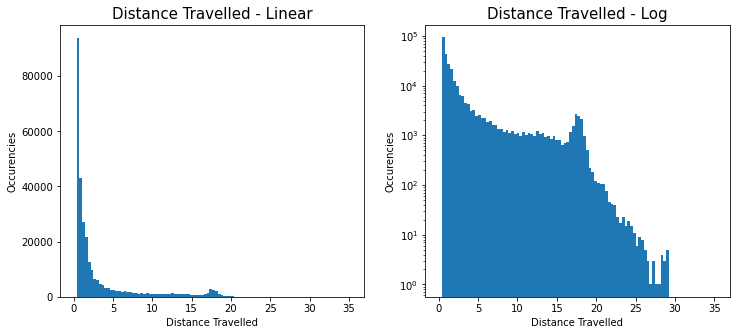

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex = True)
fig.set_figheight(5)
fig.set_figwidth(12)

ax1.hist(taxi.Trip_Miles, bins = 100, range = (0.05, 35.2))
ax1.set_title('Distance Travelled - Linear', fontsize='15')
ax1.set_xlabel('Distance Travelled')
ax1.set_ylabel('Occurencies')

ax2.hist(taxi.Trip_Miles, bins = 100, range = (0.05, 35.2))
ax2.set_title('Distance Travelled - Log', fontsize='15')
plt.yscale('log')
ax2.set_xlabel('Distance Travelled')
ax2.set_ylabel('Occurencies')
plt.show()

#### Let's investigate why there are so many trips that are 17.5 miles long.

We isolate trips between **16** and **19**  miles

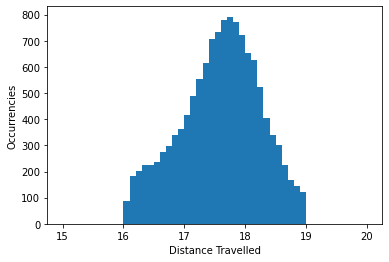

In [45]:
trips = taxi[(taxi.Trip_Miles > 16) & (taxi.Trip_Miles < 19)]
plt.hist(trips.Trip_Miles, bins = 50, range = (15, 20))
plt.xlabel('Distance Travelled')
plt.ylabel('Occurrencies')
plt.show()

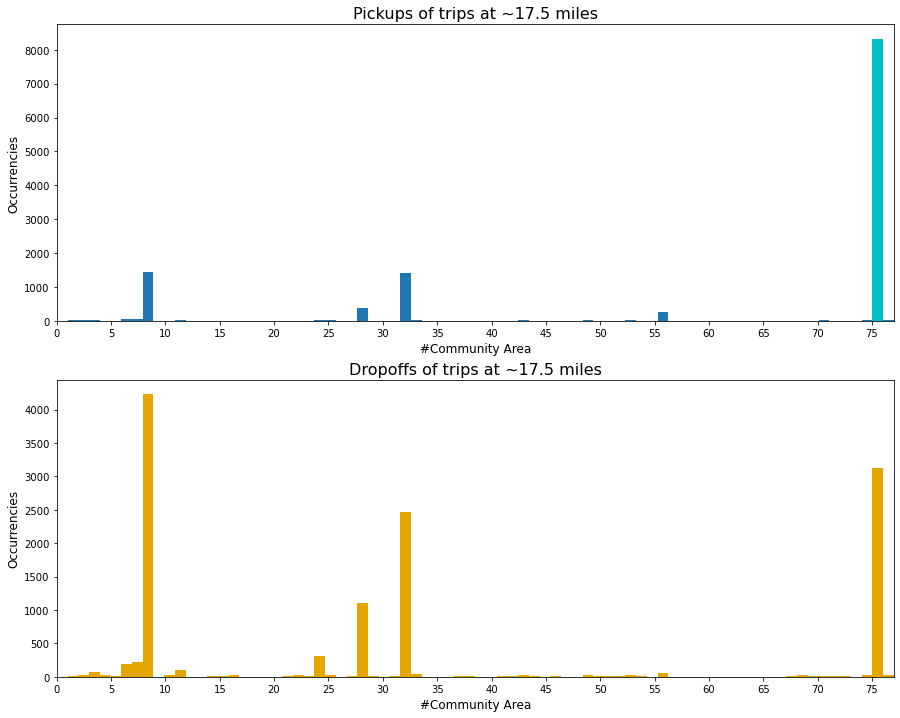

In [46]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(15)

n, bins, patches = ax1.hist(trips.Pickup_Community_Area, bins = 77)
patches[75].set_fc('c')
ax1.set_xlabel('#Community Area', fontsize=12)
ax1.set_ylabel('Occurrencies', fontsize=12)
ax1.set_title('Pickups of trips at ~17.5 miles', fontsize = 16)
ax1.set_xlim(xmin=1, xmax = 77)
ax1.set_xticks(np.arange(0, 77, 5))

ax2.hist(trips.Dropoff_Community_Area, bins = 77, color='#e6a600')
ax2.set_xlabel('#Community Area', fontsize=12)
ax2.set_ylabel('Occurrencies', fontsize=12)
ax2.set_title('Dropoffs of trips at ~17.5 miles', fontsize = 16)
ax2.set_xlim(xmin=1, xmax = 77)
ax2.set_xticks(np.arange(0, 77, 5))
plt.show()

Most trips between **16** and **19** miles start from **Community_Area 76 - O'Hare Airport**

Most trips  between 16 e 19 miglia end in **Community_Area 8, 24, 28, 32, 76.**

* **8**: Near North Side
* **24**: West Town
* **28**: Near West Side
* **32**: Loop

We then isolate **ONLY** trips that start from **Community Area 76 (Airport).**
_Where do they go?_

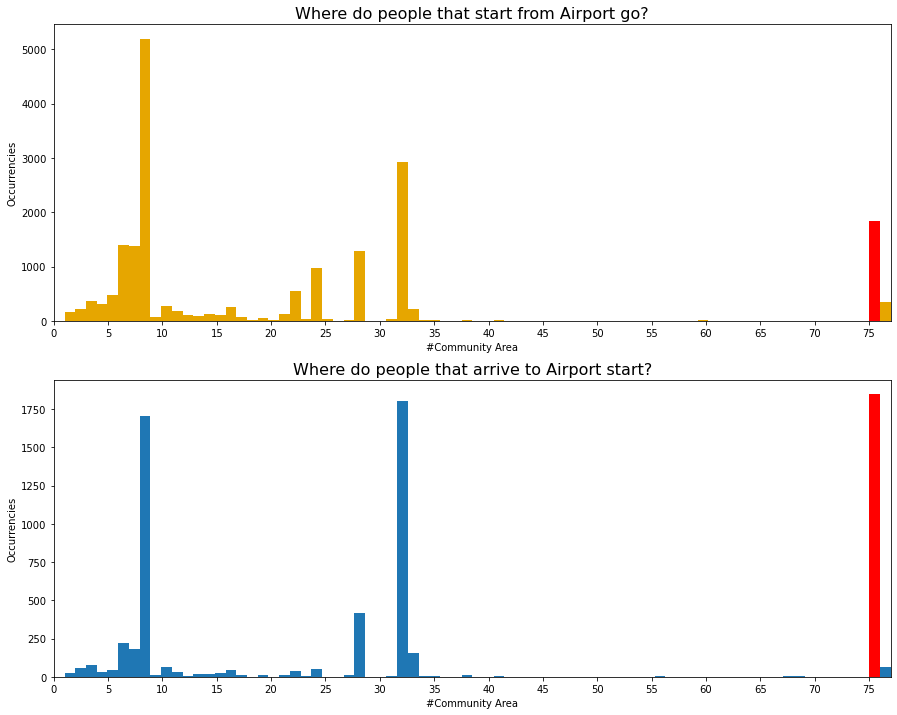

In [47]:
fig,(ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(15)

from_76 = taxi[taxi.Pickup_Community_Area == 76]
n, bins, patches = ax1.hist(from_76.Dropoff_Community_Area, bins = 77, range = (1, 77), color='#e6a600')
patches[75].set_fc(color = 'r')
ax1.set_xlabel('#Community Area')
ax1.set_ylabel('Occurrencies')
ax1.set_title('Where do people that start from Airport go?', fontsize = 16)
ax1.set_xlim(xmin=1, xmax = 77)
ax1.set_xticks(np.arange(0, 77, 5))

to_76 = taxi[taxi.Dropoff_Community_Area == 76]
n, bins, patches = ax2.hist(to_76.Pickup_Community_Area, bins = 77, range = (1,77))
patches[75].set_fc(color = 'r')
ax2.set_xlabel('#Community Area')
ax2.set_ylabel('Occurrencies')
ax2.set_title('Where do people that arrive to Airport start?', fontsize = 16)
ax2.set_xlim(xmin=1, xmax = 77)
ax2.set_xticks(np.arange(0, 77, 5))
plt.show()

Many trips start and remain within the airport area (O'Hare Aiport has a surface of more than 20 km^2). They might be internal airport trips (e.g. gate changes or other logistic movements)

#### Trip Duration

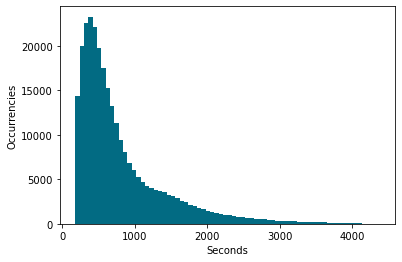

In [48]:
plt.hist(taxi.Trip_Seconds, bins = 70, range = (180, 4380), color='#026b83')
plt.xlabel('Seconds')
plt.ylabel('Occurrencies')
plt.show()

Most of the trip are below the 1000 seconds threshold.

#### Trip Total

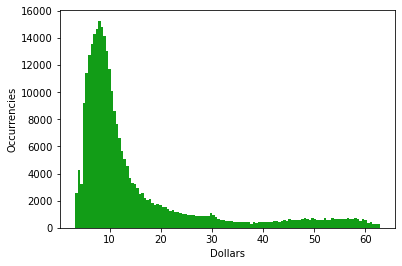

In [49]:
plt.hist(taxi.Trip_Total, bins = 120, color='#129d17')
plt.xlabel('Dollars')
plt.ylabel('Occurrencies')
plt.show()

There is a really high concentration at around 10 dollars.

#### We now plot the Pickup and Dropoff data on the Chicago map
We download OpenStreetMap Chicago areas and plot the dots.

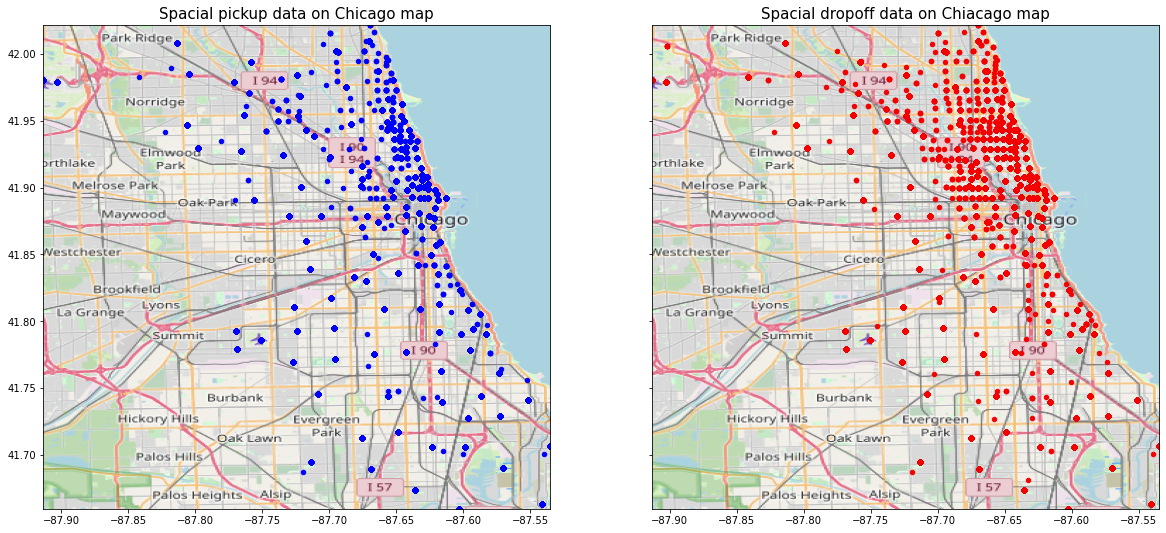

In [50]:
BBox = (taxi.Pickup_Centroid_Longitude.min(), taxi.Pickup_Centroid_Longitude.max(),
             taxi.Pickup_Centroid_Latitude.min(), taxi.Pickup_Centroid_Latitude.max())

mapp = plt.imread(Path("chicago.png"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,12), sharey = True)

ax1.scatter(taxi.Pickup_Centroid_Longitude.values, taxi.Pickup_Centroid_Latitude, zorder =1, c ='b', s=20)
ax1.set_title('Spacial pickup data on Chicago map', fontsize=15)
ax1.set_xlim(BBox[0], BBox[1])
ax1.set_ylim(BBox[2], BBox[3])

ax1.imshow(mapp, zorder = 0, extent = BBox, aspect ='equal')

BBox = (taxi.Dropoff_Centroid_Longitude.min(), taxi.Dropoff_Centroid_Longitude.max(),
             taxi.Dropoff_Centroid_Latitude.min(), taxi.Dropoff_Centroid_Latitude.max())

mapp = plt.imread(Path("chicago.png"))

#fig2, ax = plt.subplots(figsize = (20,10))

ax2.scatter(taxi.Dropoff_Centroid_Longitude.values, taxi.Dropoff_Centroid_Latitude, zorder =1, c ='#f50000', s=20)
ax2.set_title('Spacial dropoff data on Chiacago map', fontsize=15)
ax2.set_xlim(BBox[0], BBox[1])
ax2.set_ylim(BBox[2], BBox[3])

ax2.imshow(mapp, zorder = 0, extent = BBox, aspect ='equal')
plt.show()

Pickups are a bit more **concentrated** near the lakeside, while the Dropoffs are more **spread out** in the city.

#### Distance vs. trip duration

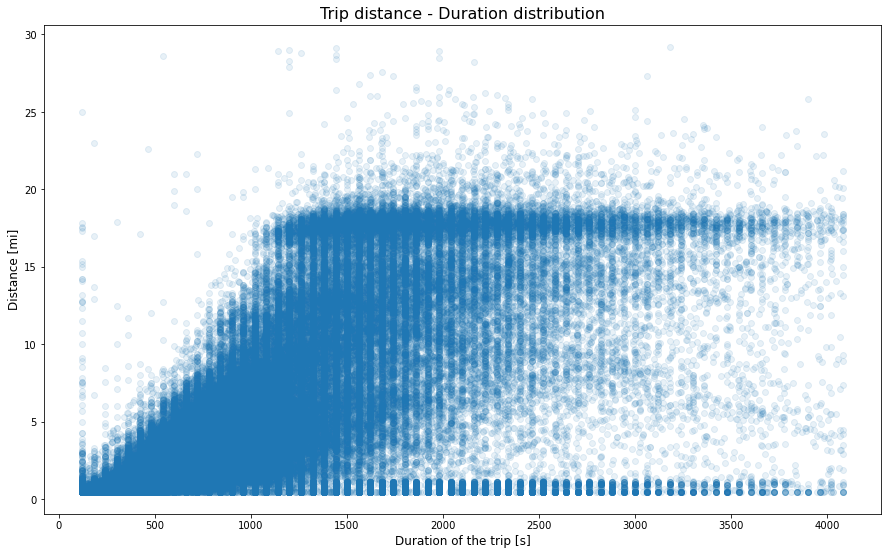

In [51]:
plt.figure(figsize=(15,9))
plt.scatter(taxi.Trip_Seconds, taxi.Trip_Miles, alpha = 0.1)
plt.xlabel('Duration of the trip [s]', fontsize=12)
plt.ylabel('Distance [mi]', fontsize=12)
plt.title('Trip distance - Duration distribution', fontsize=16)
plt.show()

**As expected, the relation is fairly linear. We notice that there are several erroneous data though**
   * On the left (low duration, long distance)
   * On the bottom (high duration, low distance)
   
There is a **plateau** at around 17.5 miles. This may be due to a **large number of trips made from and to the airport**, really influenced by traffic (high variability of trip duration).

#### Trip duration vs. cost

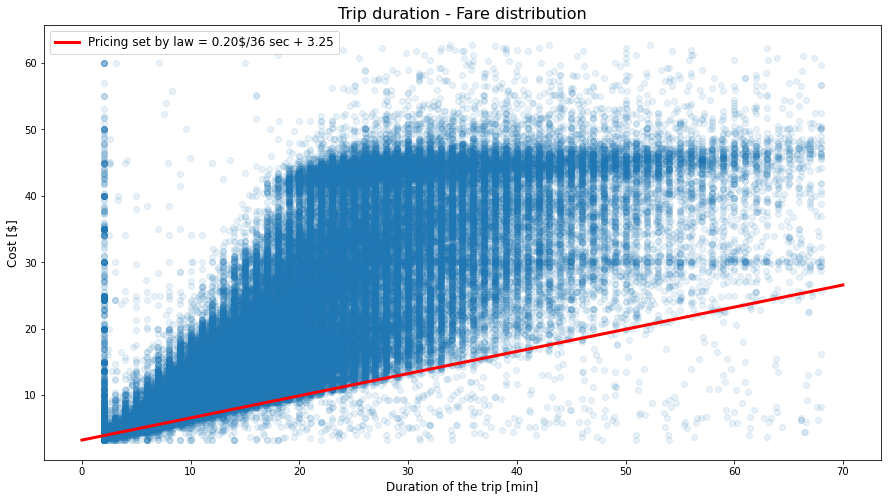

In [52]:
fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1.scatter(taxi.Trip_Seconds/60, taxi.Fare, alpha = 0.1)
ax1.set_xlabel('Duration of the trip [min]', fontsize=12)
ax1.set_ylabel('Cost [$]', fontsize=12)
ax1.set_title('Trip duration - Fare distribution', fontsize=16)

x = np.linspace(0,70,100)
y = (0.2*60/36)*x+3.25
ax1.plot(x, y, label='Pricing set by law = 0.20$/36 sec + 3.25', linewidth=3, color='r')
ax1.legend(fontsize=12)
plt.show()

**The relation is fairly linear and the lower bound follows the pricing rules of the city. Erroneous data are present.**

There is a plateau at around 45$, probably due to the frequent trips to and from the airport.

### Trip lenght vs. cost

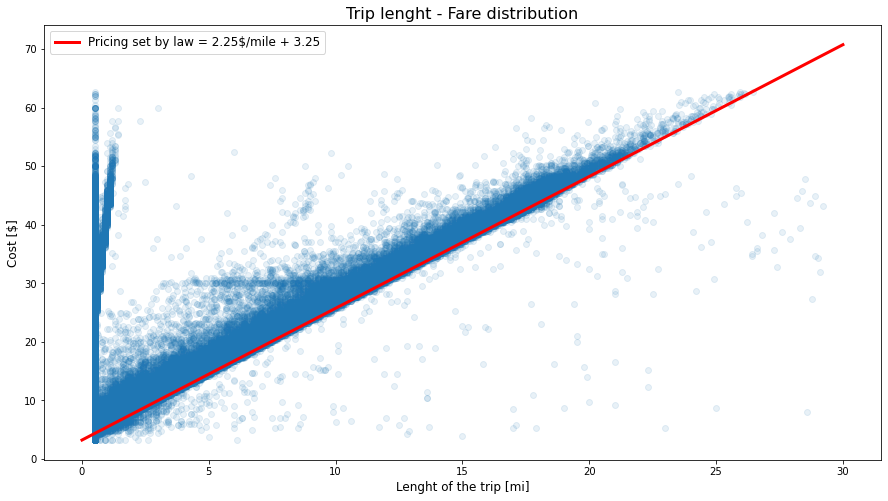

In [53]:
fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1.scatter(taxi.Trip_Miles, taxi.Fare, alpha = 0.1)
ax1.set_xlabel('Lenght of the trip [mi]', fontsize=12)
ax1.set_ylabel('Cost [$]', fontsize=12)
ax1.set_title('Trip lenght - Fare distribution', fontsize=16)

x = np.linspace(0,30,100)
y = 2.25*x+3.25
ax1.plot(x, y, label='Pricing set by law = 2.25$/mile + 3.25', linewidth=3, color='r')
ax1.legend(fontsize=12)
plt.show()

**As expected, the relation is linear and follows the pricing rules of the city. We notice that there are several erroneous data**
   * On the left (low duration, high cost)
   * On the bottom (high duration, low cost)

#### Correlation between variables

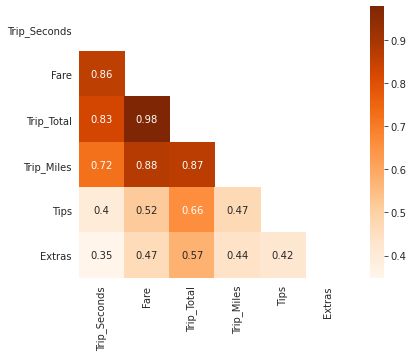

In [54]:
taxi_corr = taxi.filter(items=['Trip_Seconds', 'Fare', 'Trip_Total', 'Trip_Miles', 'Tips', 'Extras'])
corrMatrix = taxi_corr.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corrMatrix, mask=mask, annot=True, cmap='Oranges', square=True)
plt.xticks(rotation='vertical')    
plt.show()

Trips duration, trip lenght and fare have clearly a strong correlation.

### COVID-19 effect on trips features and behaviour

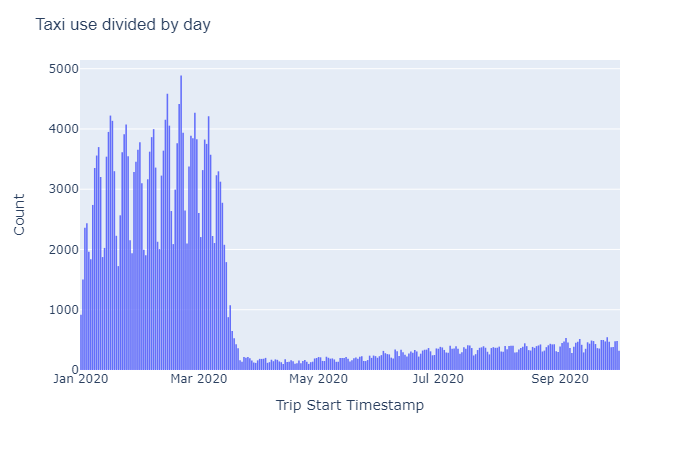

In [55]:
covid_effect = px.histogram(taxi, x="Trip_Start_Timestamp", histfunc="count", labels={"Trip_Start_Timestamp": "Trip Start Timestamp"})
covid_effect.update_yaxes(title = 'Count')
covid_effect.update_traces(xbins_size="D1")
covid_effect.update_layout(title_text='Taxi use divided by day', title_font_family="Arial")
covid_effect.update_layout(bargap=0.2)
covid_effect.show()

We notice a **fall of the usage after the start of the lockdown** so we want to better investigate by separating into **two parts**.

* **Pre COVID** 
Before 20/03
* **During COVID**
After 20/03

In [56]:
taxi_pre_covid = taxi[taxi.Trip_Start_Timestamp < '03/20/2020 00:00:00']
taxi_during_covid = taxi[taxi.Trip_Start_Timestamp >= '03/20/2020 00:00:00']

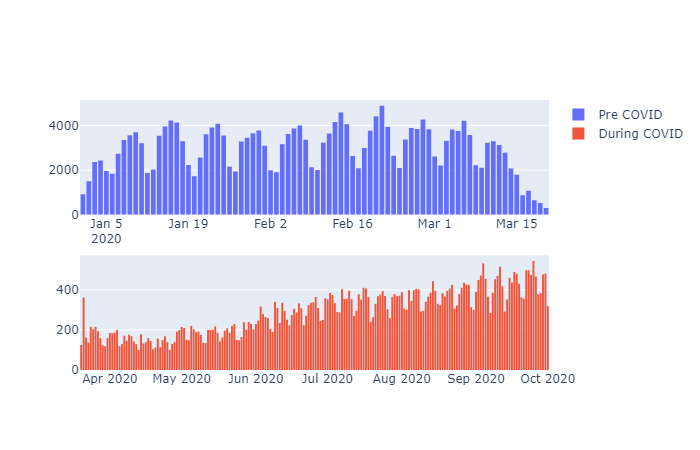

In [57]:
test = make_subplots(rows = 2, cols =1)
test.add_trace(go.Histogram(x = taxi_pre_covid.Trip_Start_Timestamp, histfunc = "count", xbins_size ='D1', name='Pre COVID'), 1, 1)
test.add_trace(go.Histogram(x = taxi_during_covid.Trip_Start_Timestamp, histfunc ="count", xbins_size ='D1', name='During COVID'), 2, 1)

test.update_layout(bargap=0.2)
test.show()

In the **pre-COVID period** we can see a weekly pattern on the use of taxi and, at the end of the period a **huge decrease** in the use of the taxis.
The same pattern can be see in the **during-COVID period** with a general **growing trend** in the use of taxis.

### Pickup Community areas (pre-COVID)

In [58]:
#We download the GEOjson Community areas data from the Chicago website
with urlopen('https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON') as response:
    geojson = json.load(response)

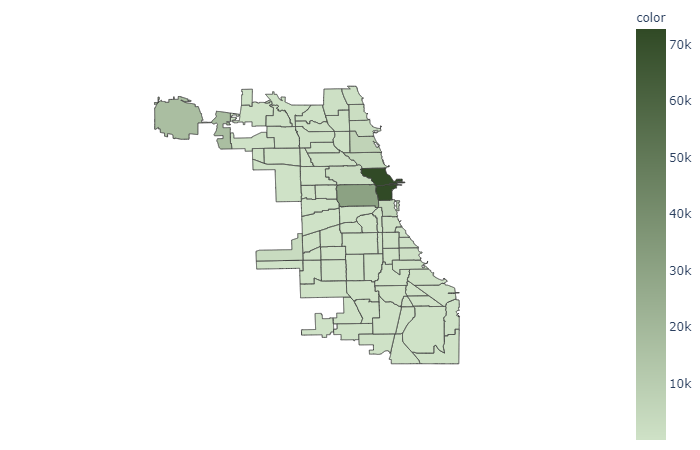

In [59]:
pre_community_Area_frequency = taxi_pre_covid['Pickup_Community_Area'].value_counts(ascending = True)
fig = px.choropleth(pre_community_Area_frequency, geojson=geojson,locations=pre_community_Area_frequency.index, color=pre_community_Area_frequency, featureidkey="properties.area_numbe", color_continuous_scale=['#cfe2c7', '#314a26'])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Pickup Community areas (during-COVID)

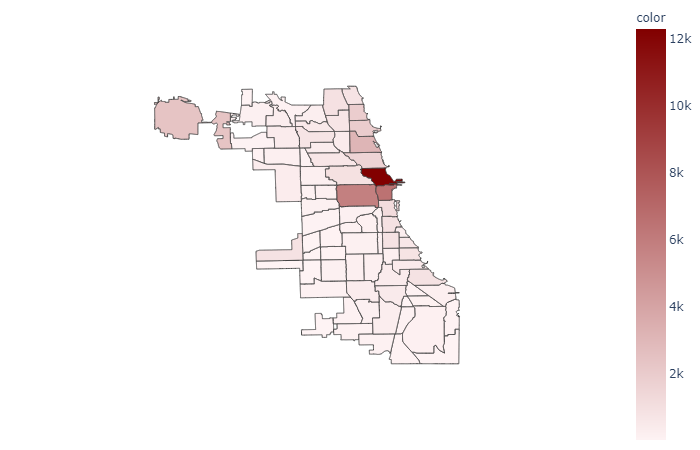

In [60]:
during_community_Area_frequency = taxi_during_covid['Pickup_Community_Area'].value_counts(ascending = True)
fig = px.choropleth(during_community_Area_frequency, geojson=geojson,locations=during_community_Area_frequency.index, color=during_community_Area_frequency, featureidkey="properties.area_numbe", color_continuous_scale=['#fef3f4', '#820000'])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Dropoff Community areas (pre-COVID)

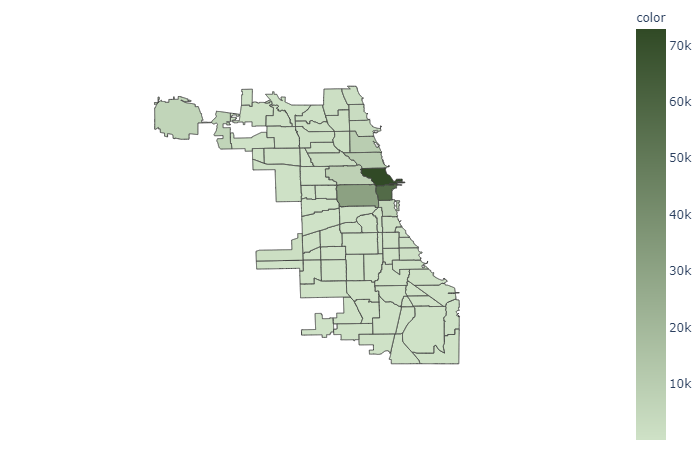

In [61]:
pre_community_Area_frequency = taxi_pre_covid['Dropoff_Community_Area'].value_counts(ascending = True)
fig = px.choropleth(pre_community_Area_frequency, geojson=geojson,locations=pre_community_Area_frequency.index, color=pre_community_Area_frequency, featureidkey="properties.area_numbe", color_continuous_scale=['#cfe2c7', '#314a26'])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Dropoff Community areas (during-COVID)

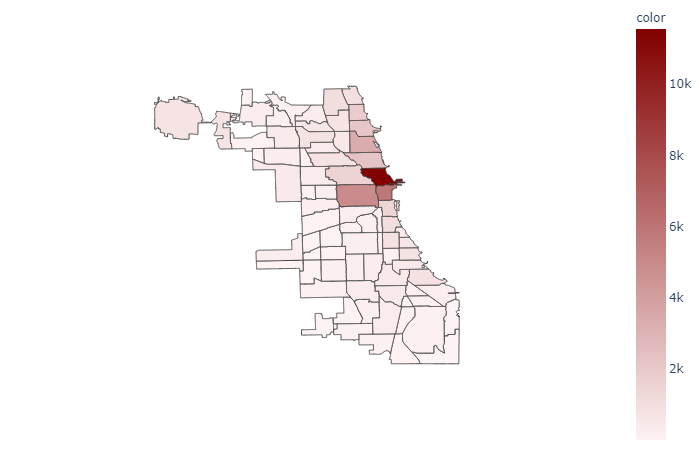

In [62]:
during_community_Area_frequency = taxi_during_covid['Dropoff_Community_Area'].value_counts(ascending = True)
fig = px.choropleth(during_community_Area_frequency, geojson=geojson,locations=during_community_Area_frequency.index, color=during_community_Area_frequency, featureidkey="properties.area_numbe",color_continuous_scale=['#fef3f4', '#820000'])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We note that the most frequented community areas prior to COVID and during the pandemic are basically the same.

However, the number of trips during COVID is greatly reduced.

### Pickup Community Areas by day of the week (pre-COVID)

We first add a new column with the corresponding weekday name:

In [63]:
#counts the number of trips for each day of the week (pre-COVID)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
taxi_pre_covid.groupby('Weekday')['Trip_ID'].count().reindex(days)

Weekday
Monday       31781
Tuesday      36384
Wednesday    40224
Thursday     43623
Friday       41442
Saturday     23259
Sunday       18850
Name: Trip_ID, dtype: int64

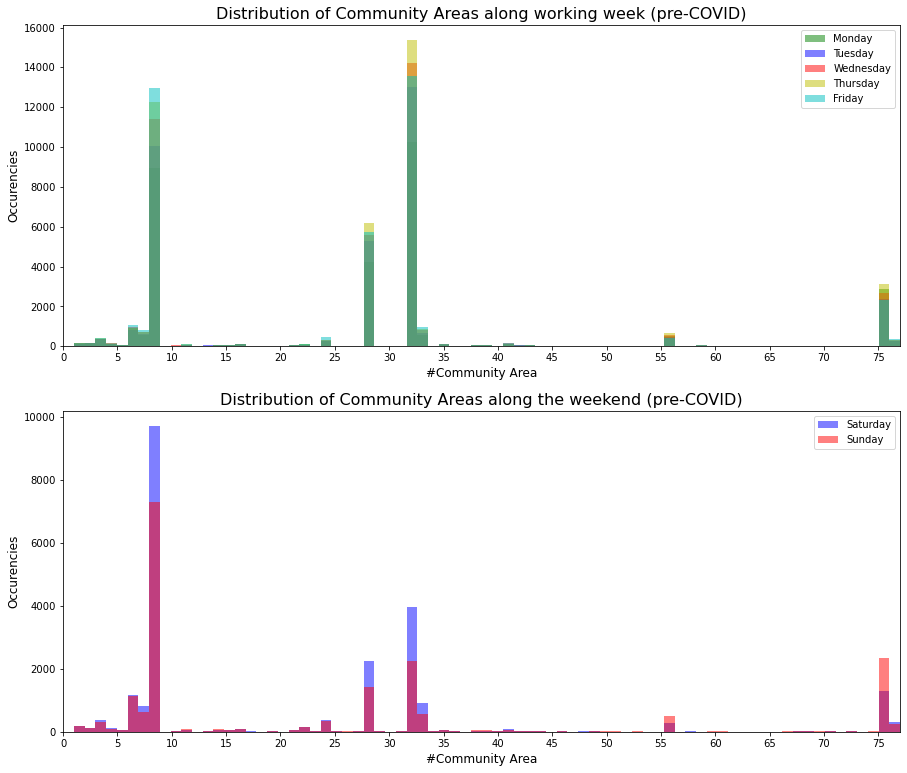

In [64]:
fig, (ax1,ax6) = plt.subplots(2,1)
fig.set_figheight(13)
fig.set_figwidth(15)

ax1.hist(taxi_pre_covid[taxi_pre_covid.Weekday == 'Monday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='g', alpha=0.5, label='Monday')
ax1.hist(taxi_pre_covid[taxi_pre_covid.Weekday == 'Tuesday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='b', alpha=0.5, label='Tuesday')
ax1.hist(taxi_pre_covid[taxi_pre_covid.Weekday == 'Wednesday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='r', alpha=0.5, label='Wednesday')
ax1.hist(taxi_pre_covid[taxi_pre_covid.Weekday == 'Thursday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='y', alpha=0.5, label='Thursday')
ax1.hist(taxi_pre_covid[taxi_pre_covid.Weekday == 'Friday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='c', alpha=0.5, label='Friday')
ax1.set_xlabel('#Community Area', fontsize=12)
ax1.set_ylabel('Occurencies', fontsize=12)
ax1.set_xlim(xmin=1, xmax = 77)
ax1.set_xticks(np.arange(0, 77, 5))
ax1.legend()
ax1.set_title('Distribution of Community Areas along working week (pre-COVID)', fontsize = 16)

ax6.hist(taxi_pre_covid[taxi_pre_covid.Weekday == 'Saturday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='b', alpha=0.5, label='Saturday')
ax6.hist(taxi_pre_covid[taxi_pre_covid.Weekday == 'Sunday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='r', alpha=0.5, label='Sunday')
ax6.set_xlabel('#Community Area', fontsize=12)
ax6.set_ylabel('Occurencies', fontsize=12)
ax6.set_title('Distribution of Community Areas along the weekend (pre-COVID)', fontsize = 16)
ax6.set_xlim(xmin=1, xmax = 77)
ax6.set_xticks(np.arange(0, 77, 5))
ax6.legend()
plt.show()

We see that most selected pickup community areas are **#8**, **#28**, **#32** and **#76**.

* **Area 32** is the "Loop", the main business district of the city, contains the HQs of many important businesses and other famous attractions like the art galleries and theaters.
* **Area 8** corresponds to the "Near North Side", one of the most central districts of the city, includes important sites such as the "Magnificent Mile" and the "Centennial Fountain".
* **Area 28** is the "Near West Side", an internal area of the city, here many important institution as  University of Illinois and Illinois Medical District are located.
* **Area 76** corresponds to the O'Hare airport.

These community areas are the **central district** of the city so more **likely to be frequented** by the majority of tourists and workers every day.

### Pickup Community Areas by day of the week (during-COVID)

We first add a new column with the corresponding weekday name

In [65]:
#counts the number of trips for each day of the week (during-COVID)
taxi_during_covid.groupby('Weekday')['Trip_ID'].count().reindex(days)

Weekday
Monday       8364
Tuesday      8643
Wednesday    8828
Thursday     8863
Friday       9673
Saturday     6906
Sunday       5303
Name: Trip_ID, dtype: int64

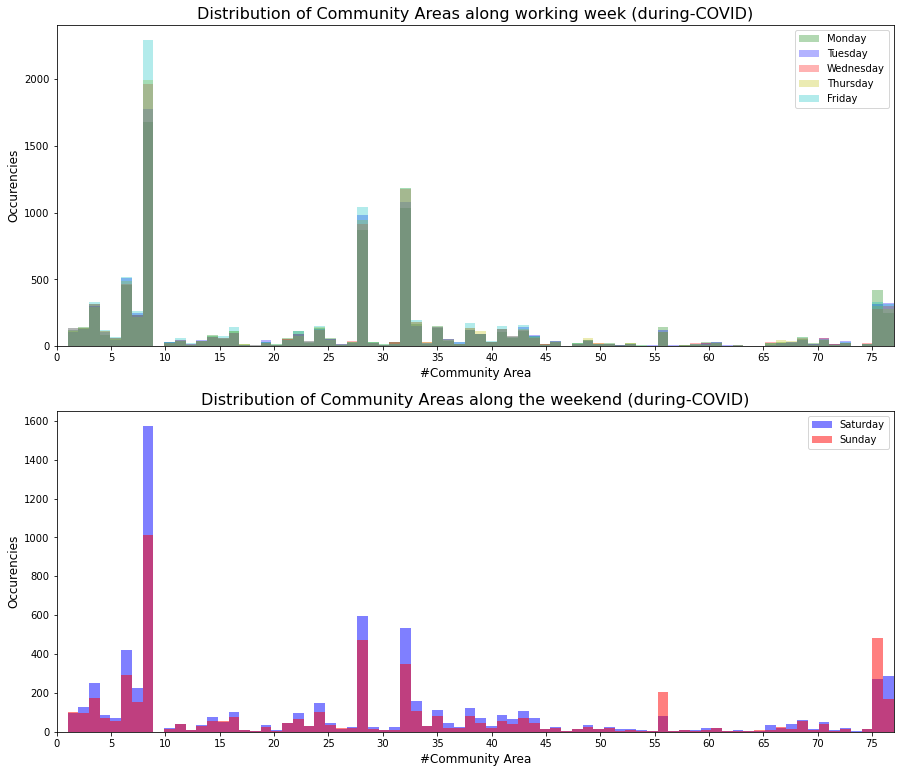

In [66]:
fig, (ax1,ax6) = plt.subplots(2,1)
fig.set_figheight(13)
fig.set_figwidth(15)

ax1.hist(taxi_during_covid[taxi_during_covid.Weekday == 'Monday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='g', alpha=0.3, label='Monday')
ax1.hist(taxi_during_covid[taxi_during_covid.Weekday == 'Tuesday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='b', alpha=0.3, label='Tuesday')
ax1.hist(taxi_during_covid[taxi_during_covid.Weekday == 'Wednesday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='r', alpha=0.3, label='Wednesday')
ax1.hist(taxi_during_covid[taxi_during_covid.Weekday == 'Thursday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='y', alpha=0.3, label='Thursday')
ax1.hist(taxi_during_covid[taxi_during_covid.Weekday == 'Friday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='c', alpha=0.3, label='Friday')
ax1.set_xlabel('#Community Area', fontsize=12)
ax1.set_ylabel('Occurencies', fontsize=12)
ax1.set_title('Distribution of Community Areas along working week (during-COVID)', fontsize = 16)
ax1.set_xlim(xmin=1, xmax = 77)
ax1.set_xticks(np.arange(0, 77, 5))
ax1.legend()

ax6.hist(taxi_during_covid[taxi_during_covid.Weekday == 'Saturday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='b', alpha=0.5, label='Saturday')
ax6.hist(taxi_during_covid[taxi_during_covid.Weekday == 'Sunday'].Pickup_Community_Area, bins = 77, range = (1, 77), color='r', alpha=0.5, label='Sunday')
ax6.set_ylabel('Occurencies', fontsize=12)
ax6.set_xlabel('#Community Area', fontsize=12)
ax6.set_title('Distribution of Community Areas along the weekend (during-COVID)', fontsize = 16)
ax6.set_xlim(xmin=1, xmax = 77)
ax6.set_xticks(np.arange(0, 77, 5))
ax6.legend()
plt.show()

We see a **reduction of trips** to Areas 32, 8, 28 and 76. We can now distinguish pickups in areas **3, 7, 6** and **77** that didn't proportionally loose the same amount of trips with respect to the city center (they're **residential areas**).

* C.A. 7 is the "Lincoln Park"
* C.A. 6 is the "Lake View"
* C.A. 3 is the "Uptown"
* C.A. 77 is the "Edgewater"

### Trips features for each hour of the day
### Pre-COVID

#### Distance vs. Time of day

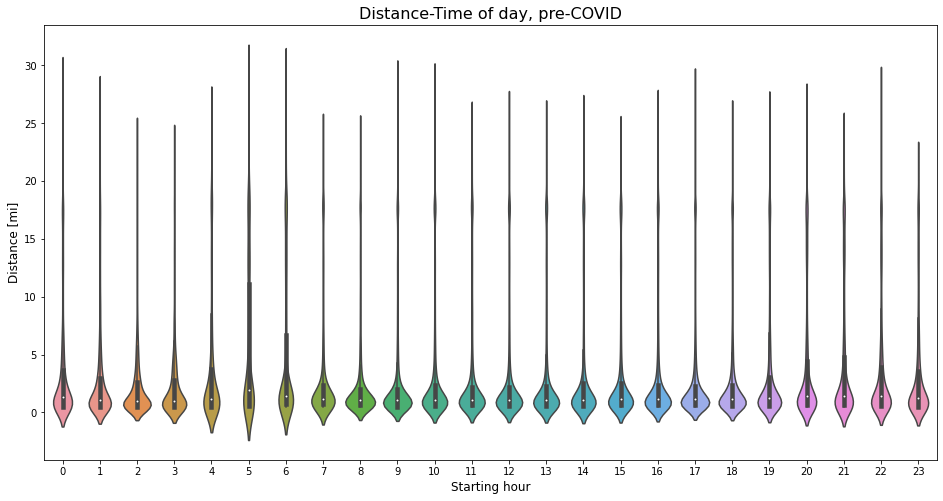

In [67]:
plt.figure(figsize=(16,8))
sns.violinplot(x = taxi_pre_covid['Trip_Start_Timestamp'].dt.hour, y = taxi_pre_covid.Trip_Miles)
plt.xlabel('Starting hour', fontsize=12)
plt.ylabel('Distance [mi]', fontsize=12)
plt.title('Distance-Time of day, pre-COVID', fontsize=16)
plt.show()

We can see from **4 AM** to **6 AM** the most heterogeneous distribution of distance.

#### Fare vs. Time of day

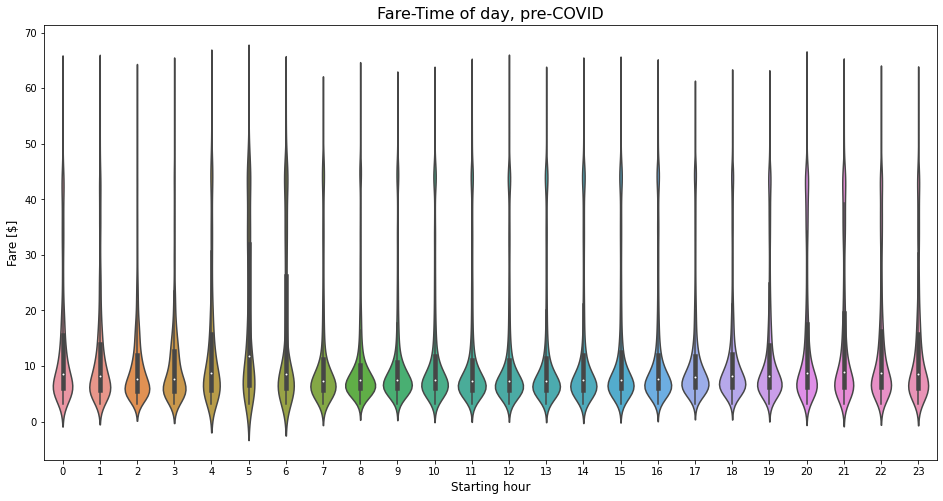

In [68]:
plt.figure(figsize=(16,8))
sns.violinplot(x = taxi_pre_covid['Trip_Start_Timestamp'].dt.hour , y= taxi_pre_covid.Fare)
plt.xlabel('Starting hour', fontsize=12)
plt.ylabel('Fare [$]', fontsize=12)
plt.title('Fare-Time of day, pre-COVID', fontsize=16)
plt.show()

We can see here that the fare paid is **slightly more spread** from 20 to 00 than during the day.       
Night travel shows the **highest variation in cost**, as we can see from 5:00 to 6:00.

### During-COVID

#### Distance vs. Time of day

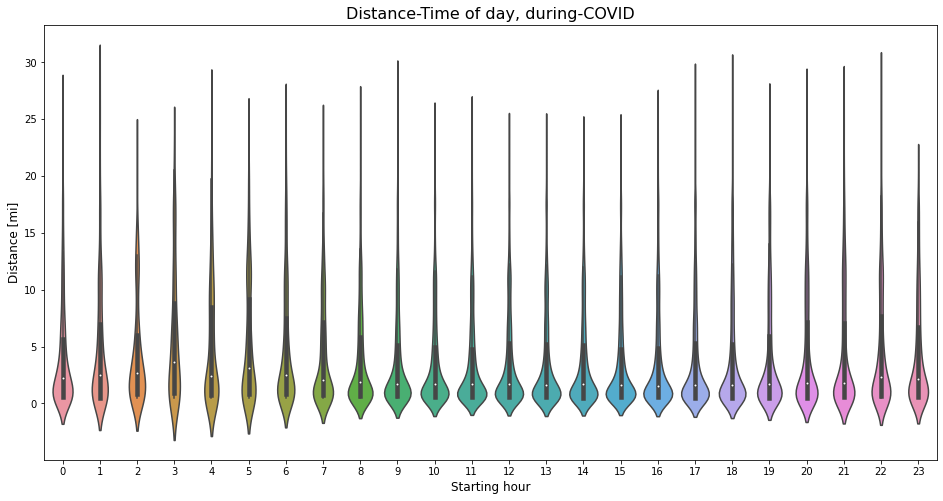

In [69]:
plt.figure(figsize=(16,8))
sns.violinplot(x = taxi_during_covid['Trip_Start_Timestamp'].dt.hour, y = taxi_during_covid.Trip_Miles)
plt.xlabel('Starting hour', fontsize=12)
plt.ylabel('Distance [mi]', fontsize=12)
plt.title('Distance-Time of day, during-COVID', fontsize=16)
plt.show()

#### Fare vs. Time of day

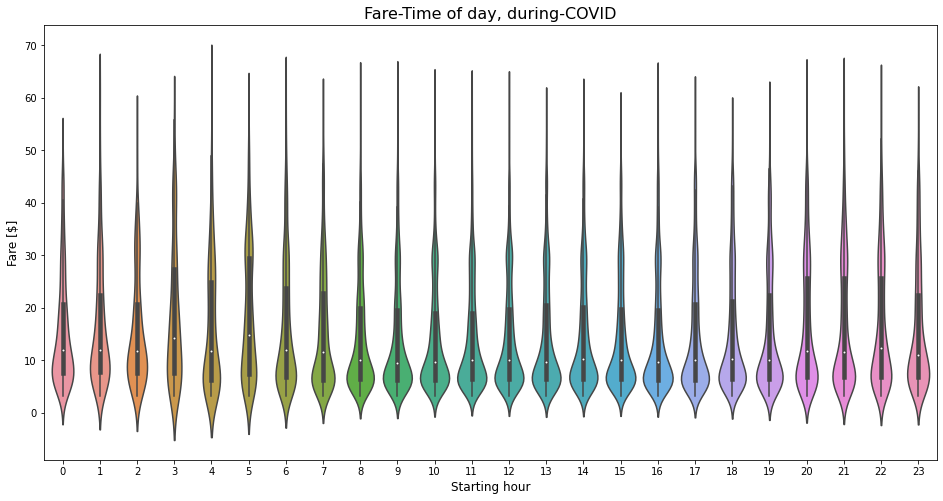

In [70]:
plt.figure(figsize=(16,8))
sns.violinplot(x = taxi_during_covid['Trip_Start_Timestamp'].dt.hour , y = taxi_during_covid.Fare)
plt.xlabel('Starting hour', fontsize=12)
plt.ylabel('Fare [$]', fontsize=12)
plt.title('Fare-Time of day, during-COVID', fontsize=16)
plt.show()

Both **distance and fare** distribution are **much more spread** towards higher values **during COVID time**.

### Finding habits of the users: pre-COVID vs. during-COVID

In [71]:
#filtering Monday trips
mon_pre_covid = taxi_pre_covid[taxi_pre_covid.Weekday == 'Monday']
#safety measure to avoid warnings
mon_pre_covid_copy = mon_pre_covid.copy()
#adding new column with the hour
mon_pre_covid_copy['Hour'] = mon_pre_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

tue_pre_covid = taxi_pre_covid[taxi_pre_covid.Weekday == 'Tuesday']
tue_pre_covid_copy = tue_pre_covid.copy()
tue_pre_covid_copy['Hour'] = tue_pre_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

wed_pre_covid = taxi_pre_covid[taxi_pre_covid.Weekday == 'Wednesday']
wed_pre_covid_copy = wed_pre_covid.copy()
wed_pre_covid_copy['Hour'] = wed_pre_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

thu_pre_covid = taxi_pre_covid[taxi_pre_covid.Weekday == 'Thursday']
thu_pre_covid_copy = thu_pre_covid.copy()
thu_pre_covid_copy['Hour'] = thu_pre_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

fri_pre_covid = taxi_pre_covid[taxi_pre_covid.Weekday == 'Friday']
fri_pre_covid_copy = fri_pre_covid.copy()
fri_pre_covid_copy['Hour'] = fri_pre_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

sat_pre_covid = taxi_pre_covid[taxi_pre_covid.Weekday == 'Saturday']
sat_pre_covid_copy = sat_pre_covid.copy()
sat_pre_covid_copy['Hour'] = sat_pre_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

sun_pre_covid = taxi_pre_covid[taxi_pre_covid.Weekday == 'Sunday']
sun_pre_covid_copy = sun_pre_covid.copy()
sun_pre_covid_copy['Hour'] = sun_pre_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

In [72]:
weather.DATE = pd.to_datetime(weather.DATE)

weather_date = weather.filter(items=['DATE'])
weather_date_pre_covid = weather_date[weather_date.DATE < '03/20/2020']
weather_date_during_covid = weather_date[weather_date.DATE >= '03/20/2020']

print(weather_date_pre_covid.shape)
print(weather_date_during_covid.shape)

(79, 1)
(216, 1)


In [73]:
weather_date_pre_covid_copy = weather_date_pre_covid.copy()  #safety measure to avoid warnings
weather_date_pre_covid_copy['Weekday'] = weather_date_pre_covid_copy['DATE'].apply(lambda x: x.day_name())
weather_date_pre_covid_copy.shape

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
n_labels = weather_date_pre_covid_copy['Weekday'].value_counts().reindex(days)
n_labels

Monday       11
Tuesday      11
Wednesday    12
Thursday     12
Friday       11
Saturday     11
Sunday       11
Name: Weekday, dtype: int64

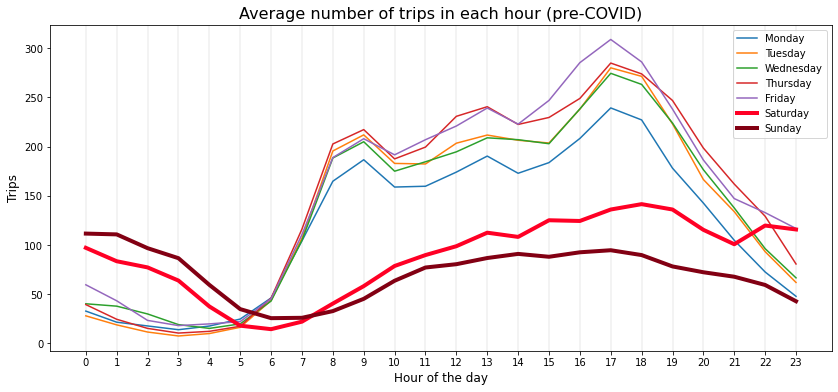

In [74]:
#We plot the trend of the number of trips over the 24h for each day of the week

fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(14)

ax1.plot(mon_pre_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels[0], label='Monday')
ax1.plot(tue_pre_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels[1], label='Tuesday')
ax1.plot(wed_pre_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels[2], label='Wednesday')
ax1.plot(thu_pre_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels[3], label='Thursday')
ax1.plot(fri_pre_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels[4], label='Friday')
ax1.plot(sat_pre_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels[5], label='Saturday', linewidth=4, color='#ff0025')
ax1.plot(sun_pre_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels[6], label='Sunday', linewidth=4, color='#820013')
ax1.set_xlabel('Hour of the day', fontsize=12)
ax1.set_ylabel('Trips', fontsize=12)
plt.title('Average number of trips in each hour (pre-COVID)', fontsize = 16)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.grid(axis='x', linewidth=0.3)
ax1.legend()
plt.show()

In pre-COVID time, we see an **higher amount of trips during weekdays** compared to the weekend.

Moreover, the number of trips during the **night** is **higher** in the weekend.

In [75]:
#filtering Monday trips
mon_during_covid = taxi_during_covid[taxi_during_covid.Weekday == 'Monday']
#safety measure to avoid warnings
mon_during_covid_copy = mon_during_covid.copy()
#adding new column with the hour
mon_during_covid_copy['Hour'] = mon_during_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

tue_during_covid = taxi_during_covid[taxi_during_covid.Weekday == 'Tuesday']
tue_during_covid_copy = tue_during_covid.copy()
tue_during_covid_copy['Hour'] = tue_during_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

wed_during_covid = taxi_during_covid[taxi_during_covid.Weekday == 'Wednesday']
wed_during_covid_copy = wed_during_covid.copy()
wed_during_covid_copy['Hour'] = wed_during_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

thu_during_covid = taxi_during_covid[taxi_during_covid.Weekday == 'Thursday']
thu_during_covid_copy = thu_during_covid.copy()
thu_during_covid_copy['Hour'] = thu_during_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

fri_during_covid = taxi_during_covid[taxi_during_covid.Weekday == 'Friday']
fri_during_covid_copy = fri_during_covid.copy()
fri_during_covid_copy['Hour'] = fri_during_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

sat_during_covid = taxi_during_covid[taxi_during_covid.Weekday == 'Saturday']
sat_during_covid_copy = sat_during_covid.copy()
sat_during_covid_copy['Hour'] = sat_during_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

sun_during_covid = taxi_during_covid[taxi_during_covid.Weekday == 'Sunday']
sun_during_covid_copy = sun_during_covid.copy()
sun_during_covid_copy['Hour'] = sun_during_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

In [76]:
weather_date_during_covid_copy = weather_date_during_covid.copy()  #safety measure to avoid warnings
weather_date_during_covid_copy['Weekday'] = weather_date_during_covid_copy['DATE'].apply(lambda x: x.day_name())
weather_date_during_covid_copy.shape
n_labels_2 = weather_date_during_covid_copy['Weekday'].value_counts().reindex(days)
n_labels_2

Monday       31
Tuesday      31
Wednesday    31
Thursday     30
Friday       31
Saturday     31
Sunday       31
Name: Weekday, dtype: int64

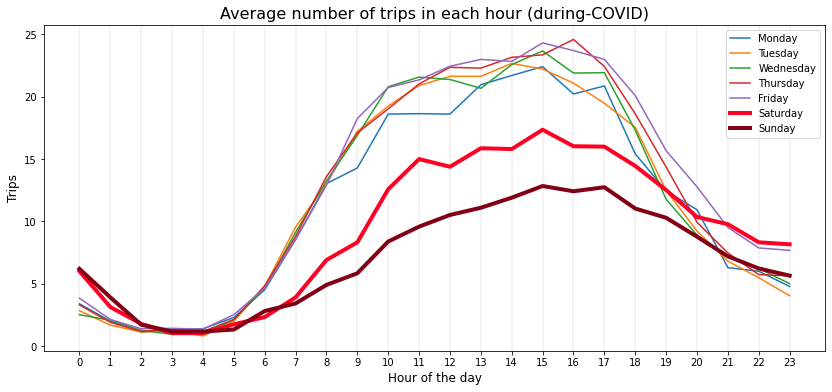

In [77]:
#We plot the trend of the number of trips over the 24h for each day of the week

fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(14)

ax1.plot(mon_during_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels_2[0], label='Monday')
ax1.plot(tue_during_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels_2[1], label='Tuesday')
ax1.plot(wed_during_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels_2[2], label='Wednesday')
ax1.plot(thu_during_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels_2[3], label='Thursday')
ax1.plot(fri_during_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels_2[4], label='Friday')
ax1.plot(sat_during_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels_2[5], label='Saturday', linewidth=4, color='#ff0025')
ax1.plot(sun_during_covid_copy.groupby('Hour')['Trip_ID'].count()/n_labels_2[6], label='Sunday', linewidth=4, color='#820013')
ax1.set_xlabel('Hour of the day', fontsize=12)
ax1.set_ylabel('Trips', fontsize=12)
plt.title('Average number of trips in each hour (during-COVID)', fontsize = 16)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.grid(axis='x', linewidth=0.3)
ax1.legend()
plt.show()

During COVID-19 pandemic, people are less likely to use taxis due to COVID restrictions and the shape of the weekend is really similar to the working days.

### Where do most trips start from in the mornings, and in the evenings?

In [78]:
#safety measure to avoid warnings
taxi_pre_covid_copy = taxi_pre_covid.copy()
#adding new column with the hour
taxi_pre_covid_copy['Hour'] = taxi_pre_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

#safety measure to avoid warnings
taxi_during_covid_copy = taxi_during_covid.copy()
#adding new column with the hour
taxi_during_covid_copy['Hour'] = taxi_during_covid_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

We split the dataset into **morning** (from 5:00 to 11:00) and **evening** trips (from 18:00 to 23:00).

In [79]:
#filtering only morning trips
morning_pre_covid = taxi_pre_covid_copy[(taxi_pre_covid_copy.Hour >= 5) & (taxi_pre_covid_copy.Hour <= 11)]
#filtering only evening trips
evening_pre_covid = taxi_pre_covid_copy[(taxi_pre_covid_copy.Hour >= 18) & (taxi_pre_covid_copy.Hour <= 23)]

morning_during_covid = taxi_during_covid_copy[(taxi_during_covid_copy.Hour >= 5) & (taxi_during_covid_copy.Hour <= 11)]
evening_during_covid = taxi_during_covid_copy[(taxi_during_covid_copy.Hour >= 18) & (taxi_during_covid_copy.Hour <= 23)]

### Pickups in the morning and in the evening

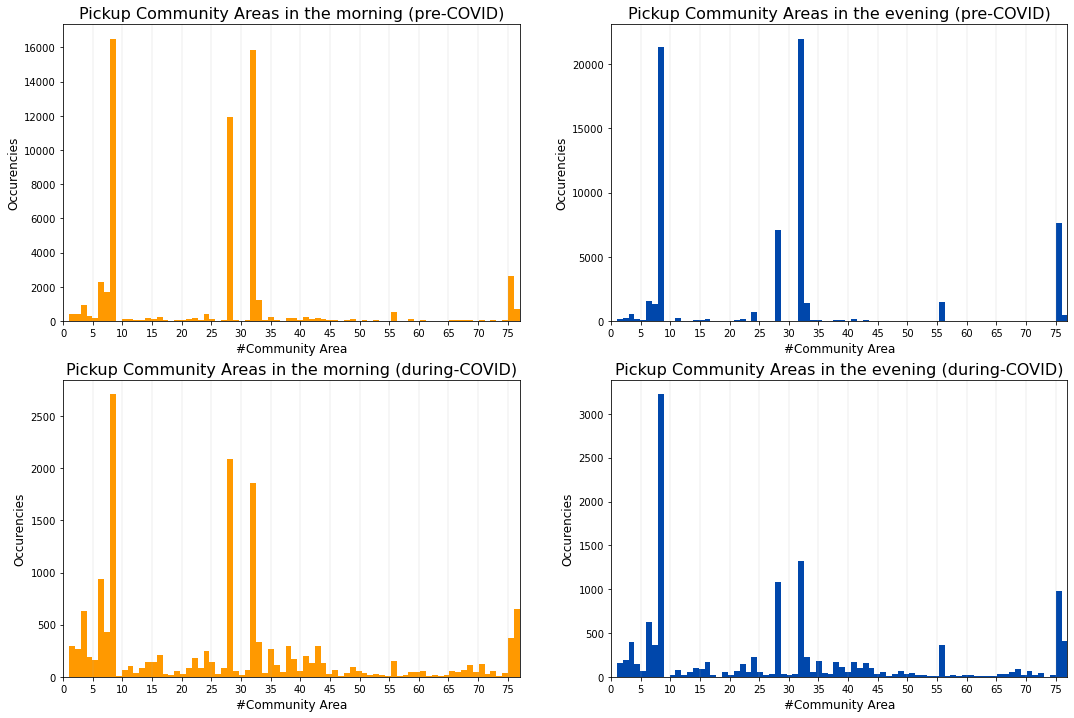

In [80]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(18)

#pre-COVID
ax1.hist(morning_pre_covid.Pickup_Community_Area, bins = 77, range = (1, 77), color='#ff9900')
ax1.set_xlabel('#Community Area', fontsize=12)
ax1.set_ylabel('Occurencies', fontsize=12)
ax1.set_title('Pickup Community Areas in the morning (pre-COVID)', fontsize = 16)
ax1.set_xlim(xmin=1, xmax = 77)
ax1.set_xticks(np.arange(0, 77, 5))
ax1.grid(axis='x', linewidth=0.2)

ax2.hist(evening_pre_covid.Pickup_Community_Area, bins = 77, range = (1, 77), color='#0047ab')
ax2.set_ylabel('Occurencies', fontsize=12)
ax2.set_xlabel('#Community Area', fontsize=12)
ax2.set_title('Pickup Community Areas in the evening (pre-COVID)', fontsize = 16)
ax2.set_xlim(xmin=1, xmax = 77)
ax2.set_xticks(np.arange(0, 77, 5))
ax2.grid(axis='x', linewidth=0.2)

#during-COVID
ax3.hist(morning_during_covid.Pickup_Community_Area, bins = 77, range = (1, 77), color='#ff9900')
ax3.set_xlabel('#Community Area', fontsize=12)
ax3.set_ylabel('Occurencies', fontsize=12)
ax3.set_title('Pickup Community Areas in the morning (during-COVID)', fontsize = 16)
ax3.set_xlim(xmin=1, xmax = 77)
ax3.set_xticks(np.arange(0, 77, 5))
ax3.grid(axis='x', linewidth=0.2)

ax4.hist(evening_during_covid.Pickup_Community_Area, bins = 77, range = (1, 77), color='#0047ab')
ax4.set_ylabel('Occurencies', fontsize=12)
ax4.set_xlabel('#Community Area', fontsize=12)
ax4.set_title('Pickup Community Areas in the evening (during-COVID)', fontsize = 16)
ax4.set_xlim(xmin=1, xmax = 77)
ax4.set_xticks(np.arange(0, 77, 5))
ax4.grid(axis='x', linewidth=0.2)
plt.show()

Both in the pre-COVID and in the during-COVID period the amount of **pickups at the airport increases in the evening and is lower in the morning**.

During COVID:
* The amount of trips is overall severely reduced.
* The number of pickups in area 32 decreases especially during the night.

### Dropoffs in the morning and in the evening

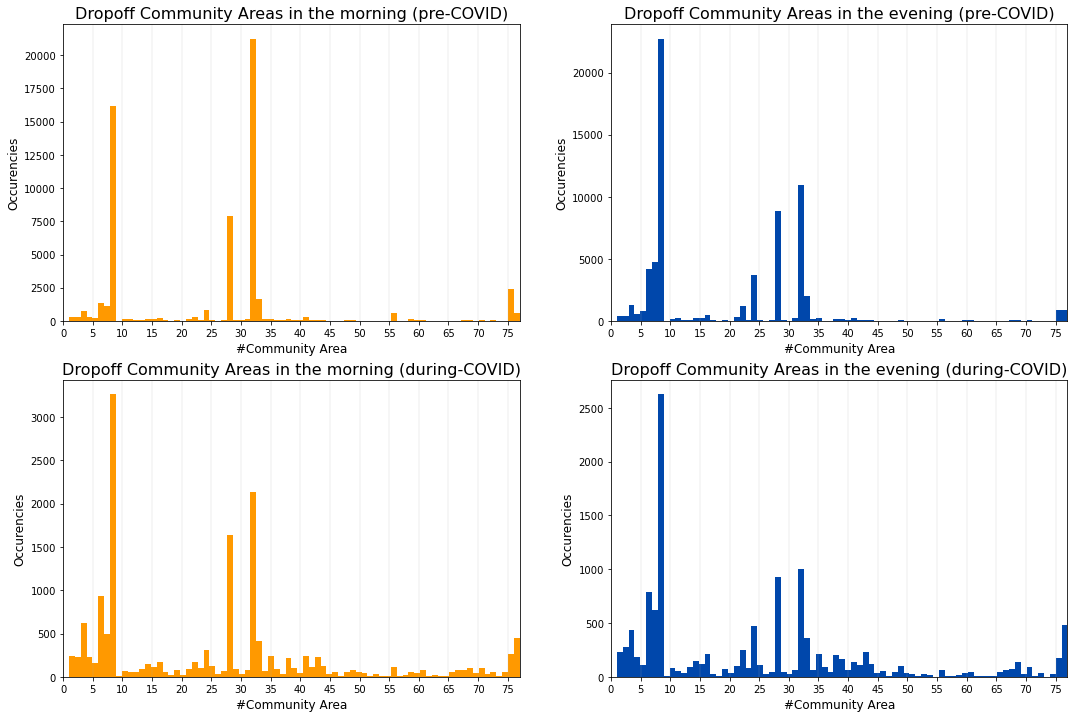

In [81]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(18)

#pre-COVID
ax1.hist(morning_pre_covid.Dropoff_Community_Area, bins = 77, range = (1, 77), color='#ff9900')
ax1.set_xlabel('#Community Area', fontsize=12)
ax1.set_ylabel('Occurencies', fontsize=12)
ax1.set_title('Dropoff Community Areas in the morning (pre-COVID)', fontsize = 16)
ax1.set_xlim(xmin=1, xmax = 77)
ax1.set_xticks(np.arange(0, 77, 5))
ax1.grid(axis='x', linewidth=0.2)

ax2.hist(evening_pre_covid.Dropoff_Community_Area, bins = 77, range = (1, 77), color='#0047ab')
ax2.set_ylabel('Occurencies', fontsize=12)
ax2.set_xlabel('#Community Area', fontsize=12)
ax2.set_title('Dropoff Community Areas in the evening (pre-COVID)', fontsize = 16)
ax2.set_xlim(xmin=1, xmax = 77)
ax2.set_xticks(np.arange(0, 77, 5))
ax2.grid(axis='x', linewidth=0.2)

#during-COVID
ax3.hist(morning_during_covid.Dropoff_Community_Area, bins = 77, range = (1, 77), color='#ff9900')
ax3.set_xlabel('#Community Area', fontsize=12)
ax3.set_ylabel('Occurencies', fontsize=12)
ax3.set_title('Dropoff Community Areas in the morning (during-COVID)', fontsize = 16)
ax3.set_xlim(xmin=1, xmax = 77)
ax3.set_xticks(np.arange(0, 77, 5))
ax3.grid(axis='x', linewidth=0.2)

ax4.hist(evening_during_covid.Dropoff_Community_Area, bins = 77, range = (1, 77), color='#0047ab')
ax4.set_ylabel('Occurencies', fontsize=12)
ax4.set_xlabel('#Community Area', fontsize=12)
ax4.set_title('Dropoff Community Areas in the evening (during-COVID)', fontsize = 16)
ax4.set_xlim(xmin=1, xmax = 77)
ax4.set_xticks(np.arange(0, 77, 5))
ax4.grid(axis='x', linewidth=0.2)
plt.show()

In **pre-COVID** period the most selected pickups areas are the most central: 32, 8, 28 plus the airport 76. We can see a decrease of dropoffs in area 32 in the evening.

**During-COVID**,  we equally see a reduction of dropoffs in area 32 in the evening  with respect to the morning and a more homogeneous distribution of dropoffs among the city.

## Trips features migration between pre-COVID and during-COVID time

* #### Average Fare, average trip lenght and average duration

In [82]:
fare_pre = taxi_pre_covid_copy.groupby('Weekday')['Fare'].mean().reindex(days)
mean_fare_pre = fare_pre.reset_index()

fare_during = taxi_during_covid.groupby('Weekday')['Fare'].mean().reindex(days)
mean_fare_during = fare_during.reset_index()

lenght_pre = taxi_pre_covid_copy.groupby('Weekday')['Trip_Miles'].mean().reindex(days)
mean_lenght_pre = lenght_pre.reset_index()

lenght_during = taxi_during_covid.groupby('Weekday')['Trip_Miles'].mean().reindex(days)
mean_lenght_during = lenght_during.reset_index()

duration_pre = taxi_pre_covid_copy.groupby('Weekday')['Trip_Seconds'].mean().reindex(days)
mean_duration_pre = duration_pre.reset_index()

duration_during = taxi_during_covid.groupby('Weekday')['Trip_Seconds'].mean().reindex(days)
mean_duration_during = duration_during.reset_index()

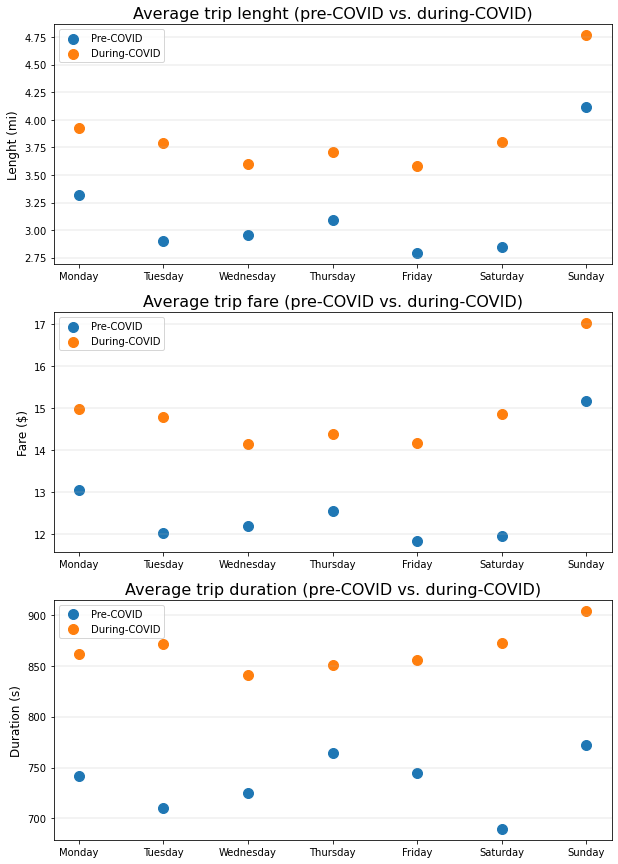

In [83]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(10)

ax1.scatter(mean_lenght_pre.Weekday, mean_lenght_pre.Trip_Miles, label='Pre-COVID', s=100)
ax1.scatter(mean_lenght_during.Weekday, mean_lenght_during.Trip_Miles, label='During-COVID', s=100)
ax1.set_ylabel('Lenght (mi)', fontsize=12)
ax1.set_title('Average trip lenght (pre-COVID vs. during-COVID)', fontsize = 16)
ax1.grid(True, axis='y', linewidth=0.3)
ax1.legend()

ax2.scatter(mean_fare_pre.Weekday, mean_fare_pre.Fare, label='Pre-COVID', s=100)
ax2.scatter(mean_fare_during.Weekday, mean_fare_during.Fare, label='During-COVID', s=100)
ax2.set_ylabel('Fare ($)', fontsize=12)
ax2.set_title('Average trip fare (pre-COVID vs. during-COVID)', fontsize = 16)
ax2.grid(True, axis='y', linewidth=0.3)
ax2.legend()

ax3.scatter(mean_duration_pre.Weekday, mean_duration_pre.Trip_Seconds, label='Pre-COVID', s=100)
ax3.scatter(mean_duration_during.Weekday, mean_duration_during.Trip_Seconds, label='During-COVID', s=100)
ax3.set_ylabel('Duration (s)', fontsize=12)
ax3.set_title('Average trip duration (pre-COVID vs. during-COVID)', fontsize = 16)
ax3.grid(True, axis='y', linewidth=0.3)
ax3.legend()
plt.show()

During COVID, users paid generally **more** for their trips. Trips were **generally longer** with respect to the pre-COVID situation.

### Number of calls by taxi company

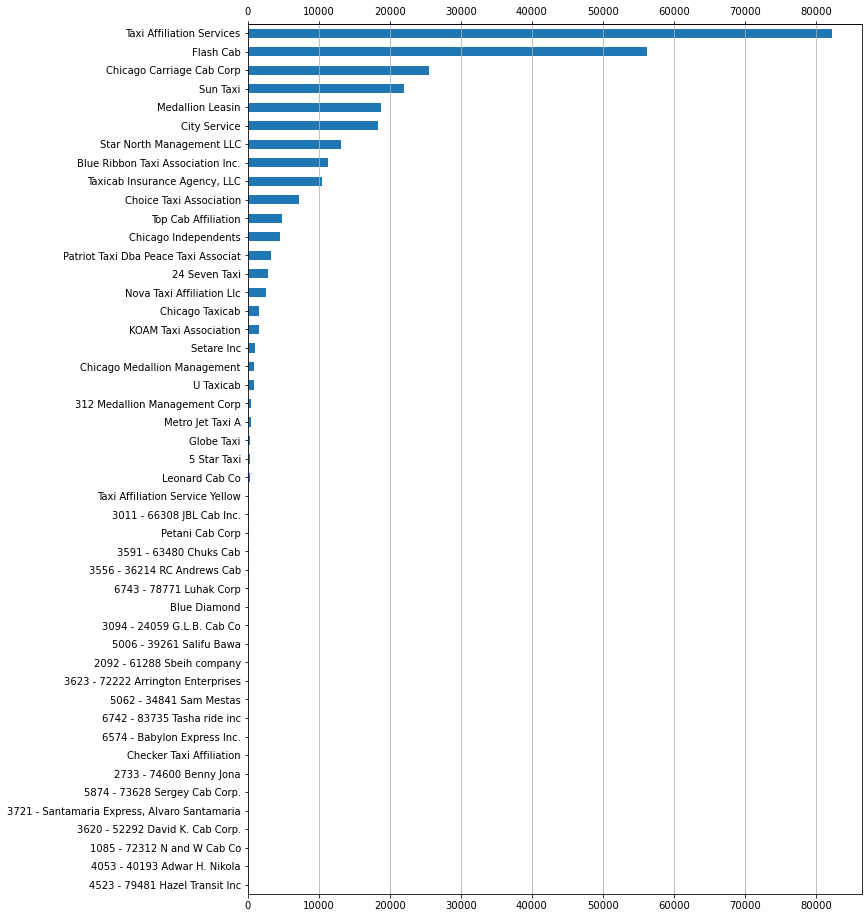

In [84]:
fig, ax = plt.subplots()
ax = taxi.Company.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(11,16), fontsize=10)
ax.grid(b=None, which='major', axis='x')
ax.secondary_xaxis('top')
plt.show()

### Average cost per minute of the companies

In [85]:
features_labels = taxi.Company.unique()
perf = np.zeros(47)
#writes in an array every company name
for i in range(len(features_labels)):  #for each name
    subset = taxi[taxi.Company == features_labels[i]]
    num = subset.Fare.mean()  
    den = subset.Trip_Seconds.mean()/60
    if (den!=0):
        perf[i] = num/den
    else:
        perf[i] = 0

In [86]:
array_names = features_labels

In [87]:
company_name = pd.DataFrame(array_names, columns=['Name'])
company_ratio = pd.DataFrame(perf, columns=['Cost'])
company_perf = pd.concat([company_name, company_ratio], axis=1)

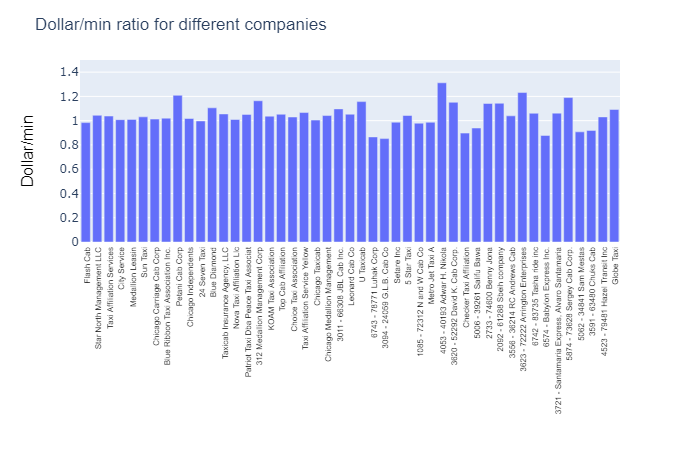

In [88]:
fig = px.bar(company_perf, x='Name', y='Cost', labels={"Name": " ", "Cost": "Dollar/min"})
fig.update_layout(title_text='Dollar/min ratio for different companies', title_font_family="Arial")
fig.update_layout(autosize=False, width=800, height=500)
fig.update_layout(barmode='group', xaxis_tickangle=-90)
fig.update_xaxes(title_font=dict(size=12, family='Arial', color='black'), tickfont=dict(family='Arial', color='black', size=8))
fig.update_yaxes(range=[0, 1.5], title_font=dict(size=16, family='Arial', color='black'), nticks=10)

The price per minute is substantially the same among all companies (fixed tariff).

### Payment type

We add to  the DataFrame two columns with **median income** and **age** for each Community Area.

In [89]:
ia = pd.read_csv(Path("Income_Age_comm_area.csv")) # this open the csv dataset considering the path
ia.columns = ['ca_num', 'ca_name', 'income', 'age']
ia.shape
taxi.shape

def ca_income(ca):
    community = ia.loc[ca-1]
    return(community['income'])
def ca_age(ca):
    community = ia.loc[ca-1]
    return(community['age'])

taxi['ca_income'] = taxi['Pickup_Community_Area'].apply(lambda x: ca_income(x))
taxi['ca_age'] = taxi['Pickup_Community_Area'].apply(lambda x: ca_age(x))

In [90]:
#Filtering only Cash payments
cash = taxi[taxi['Payment_Type'] == 'Cash']

In [91]:
#Filtering only Credit Card payments
cc = taxi[taxi['Payment_Type'] == 'Credit Card']

In [92]:
#Filtering only Phone payments
phone = taxi[taxi['Payment_Type'] == 'Mobile']

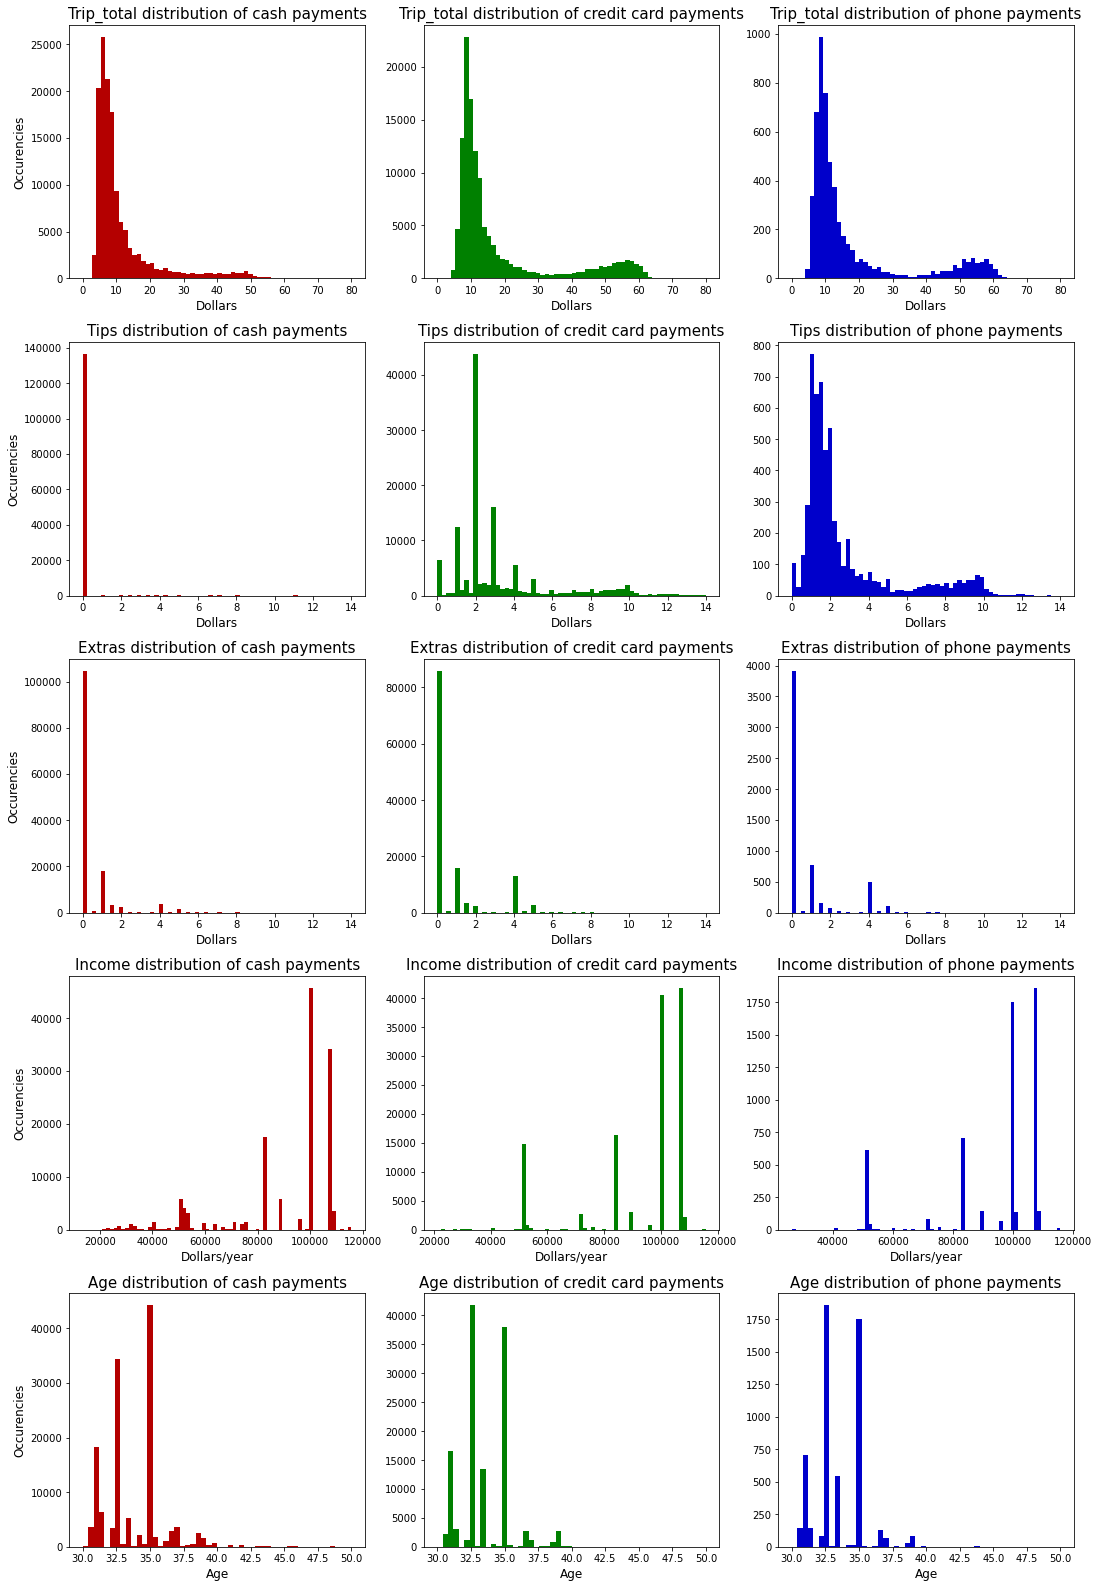

In [93]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3)
fig.set_figheight(28)
fig.set_figwidth(18)
fig.subplots_adjust(hspace=0.25)

ax1.hist(cash.Trip_Total, bins=60, range=(0,80), color='#b40000')
ax1.set_ylabel('Occurencies', fontsize=12)
ax1.set_title('Trip_total distribution of cash payments', fontsize = 15)
ax1.set_xlabel('Dollars', fontsize=12)

ax2.hist(cc.Trip_Total, bins=60, range=(0,80), color='g')
ax2.set_title('Trip_total distribution of credit card payments', fontsize = 15)
ax2.set_xlabel('Dollars', fontsize=12)

ax3.hist(phone.Trip_Total, bins=60, range=(0,80), color='#0000cb')
ax3.set_title('Trip_total distribution of phone payments', fontsize = 15)
ax3.set_xlabel('Dollars', fontsize=12)

ax4.hist(cash.Tips, bins=60, range=(0,14), color='#b40000')
ax4.set_ylabel('Occurencies', fontsize=12)
ax4.set_title('Tips distribution of cash payments', fontsize = 15)
ax4.set_xlabel('Dollars', fontsize=12)

ax5.hist(cc.Tips, bins=60, range=(0,14), color='g')
ax5.set_title('Tips distribution of credit card payments', fontsize = 15)
ax5.set_xlabel('Dollars', fontsize=12)

ax6.hist(phone.Tips, bins=60, range=(0,14), color='#0000cb')
ax6.set_title('Tips distribution of phone payments', fontsize = 15)
ax6.set_xlabel('Dollars', fontsize=12)

ax7.hist(cash.Extras, bins=60, range=(0,14), color='#b40000')
ax7.set_ylabel('Occurencies', fontsize=12)
ax7.set_title('Extras distribution of cash payments', fontsize = 15)
ax7.set_xlabel('Dollars', fontsize=12)

ax8.hist(cc.Extras, bins=60, range=(0,14), color='g')
ax8.set_title('Extras distribution of credit card payments', fontsize = 15)
ax8.set_xlabel('Dollars', fontsize=12)

ax9.hist(phone.Extras, bins=60, range=(0,14), color='#0000cb')
ax9.set_title('Extras distribution of phone payments', fontsize = 15)
ax9.set_xlabel('Dollars', fontsize=12)

ax10.hist(cash.ca_income, bins=70, color='#b40000')
ax10.set_ylabel('Occurencies', fontsize=12)
ax10.set_title('Income distribution of cash payments', fontsize = 15)
ax10.set_xlabel('Dollars/year', fontsize=12)

ax11.hist(cc.ca_income, bins=70, color='g')
ax11.set_title('Income distribution of credit card payments', fontsize = 15)
ax11.set_xlabel('Dollars/year', fontsize=12)

ax12.hist(phone.ca_income, bins=70, color='#0000cb')
ax12.set_title('Income distribution of phone payments', fontsize = 15)
ax12.set_xlabel('Dollars/year', fontsize=12)

ax13.hist(cash.ca_age, bins=50, range=(30,50), color='#b40000')
ax13.set_ylabel('Occurencies', fontsize=12)
ax13.set_xlabel('Age', fontsize=12)
ax13.set_title('Age distribution of cash payments', fontsize = 15)

ax14.hist(cc.ca_age, bins=50, range=(30,50), color='g')
ax14.set_xlabel('Age', fontsize=12)
ax14.set_title('Age distribution of credit card payments', fontsize = 15)

ax15.hist(phone.ca_age, bins=50, range=(30,50), color='#0000cb')
ax15.set_xlabel('Age', fontsize=12)
ax15.set_title('Age distribution of phone payments', fontsize = 15)
plt.show()

#### Worth noting:

#### _Trip Total:_
* **More expensive trips are generally paid with credit card or phone**. Cash not really common in the 40/60 dollar range.

#### _Tips:_
* Tips associated with cash payment don't get registered or are included in the 'Fare' feature. 
Curious to note that **tips via credit cards are often rounded to a near integer** whereas **phone tips are much more granular**. It seems like there is a **pre-loaded tip amount** you can choose (i.e. a fixed percentage of the fare).

#### _Income_
* In proportion, people with **income >110,000 dollars/year and at about 50,000 dollars/year pay less with cash**.

### Analyze the influence of the weather on the taxi use

We want to visualize the influence of the weather in function of the weather.

In [94]:
#We divide the dataset by weather condition
good_weather = taxi[taxi.weather_condition == 'good weather']
fog = taxi[taxi.weather_condition == 'fog']
thunder = taxi[taxi.weather_condition == 'thunder']
wind = taxi[taxi.weather_condition == 'sunny but some wind']
rain = taxi[taxi.weather_condition == 'rain or snow']

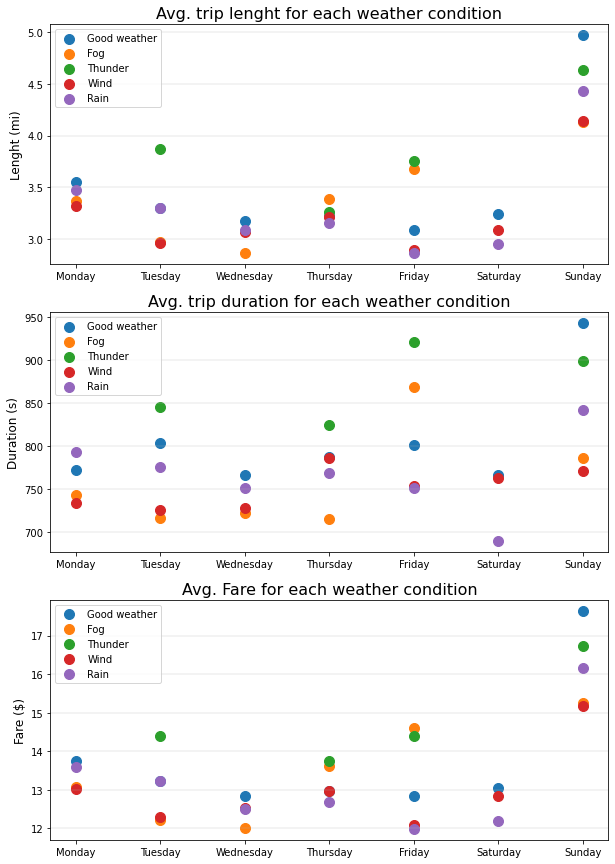

In [95]:
# ---- Trip Miles
lenght_pre_good_weather = good_weather.groupby('Weekday')['Trip_Miles'].mean().reindex(days)
mean_lenght_pre_good_weather = lenght_pre_good_weather.reset_index()

lenght_pre_fog = fog.groupby('Weekday')['Trip_Miles'].mean().reindex(days)
mean_lenght_pre_fog = lenght_pre_fog.reset_index()

lenght_pre_thunder = thunder.groupby('Weekday')['Trip_Miles'].mean().reindex(days)
mean_lenght_pre_thunder = lenght_pre_thunder.reset_index()

lenght_pre_wind = wind.groupby('Weekday')['Trip_Miles'].mean().reindex(days)
mean_lenght_pre_wind = lenght_pre_wind.reset_index()

lenght_pre_rain = rain.groupby('Weekday')['Trip_Miles'].mean().reindex(days)
mean_lenght_pre_rain = lenght_pre_rain.reset_index()
# -----

fig, (ax1,ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(10)

ax1.scatter(mean_lenght_pre_good_weather.Weekday, mean_lenght_pre_good_weather.Trip_Miles, label='Good weather', s=100)
ax1.scatter(mean_lenght_pre_fog.Weekday, mean_lenght_pre_fog.Trip_Miles, label='Fog', s=100)
ax1.scatter(mean_lenght_pre_thunder.Weekday, mean_lenght_pre_thunder.Trip_Miles, label='Thunder', s=100)
ax1.scatter(mean_lenght_pre_wind.Weekday, mean_lenght_pre_wind.Trip_Miles, label='Wind', s=100)
ax1.scatter(mean_lenght_pre_rain.Weekday, mean_lenght_pre_rain.Trip_Miles, label='Rain', s=100)
ax1.set_ylabel('Lenght (mi)', fontsize=12)
ax1.set_title('Avg. trip lenght for each weather condition', fontsize = 16)
ax1.grid(True, axis='y', linewidth=0.3)
ax1.legend()

# ---- Seconds
lenght_pre_good_weather = good_weather.groupby('Weekday')['Trip_Seconds'].mean().reindex(days)
mean_lenght_pre_good_weather = lenght_pre_good_weather.reset_index()

lenght_pre_fog = fog.groupby('Weekday')['Trip_Seconds'].mean().reindex(days)
mean_lenght_pre_fog = lenght_pre_fog.reset_index()

lenght_pre_thunder = thunder.groupby('Weekday')['Trip_Seconds'].mean().reindex(days)
mean_lenght_pre_thunder = lenght_pre_thunder.reset_index()

lenght_pre_wind = wind.groupby('Weekday')['Trip_Seconds'].mean().reindex(days)
mean_lenght_pre_wind = lenght_pre_wind.reset_index()

lenght_pre_rain = rain.groupby('Weekday')['Trip_Seconds'].mean().reindex(days)
mean_lenght_pre_rain = lenght_pre_rain.reset_index()
# -----


ax2.scatter(mean_lenght_pre_good_weather.Weekday, mean_lenght_pre_good_weather.Trip_Seconds, label='Good weather', s=100)
ax2.scatter(mean_lenght_pre_fog.Weekday, mean_lenght_pre_fog.Trip_Seconds, label='Fog', s=100)
ax2.scatter(mean_lenght_pre_thunder.Weekday, mean_lenght_pre_thunder.Trip_Seconds, label='Thunder', s=100)
ax2.scatter(mean_lenght_pre_wind.Weekday, mean_lenght_pre_wind.Trip_Seconds, label='Wind', s=100)
ax2.scatter(mean_lenght_pre_rain.Weekday, mean_lenght_pre_rain.Trip_Seconds, label='Rain', s=100)
ax2.set_ylabel('Duration (s)', fontsize=12)
ax2.set_title('Avg. trip duration for each weather condition', fontsize = 16)
ax2.grid(True, axis='y', linewidth=0.3)
ax2.legend()

# ---- Fare
lenght_pre_good_weather = good_weather.groupby('Weekday')['Fare'].mean().reindex(days)
mean_lenght_pre_good_weather = lenght_pre_good_weather.reset_index()

lenght_pre_fog = fog.groupby('Weekday')['Fare'].mean().reindex(days)
mean_lenght_pre_fog = lenght_pre_fog.reset_index()

lenght_pre_thunder = thunder.groupby('Weekday')['Fare'].mean().reindex(days)
mean_lenght_pre_thunder = lenght_pre_thunder.reset_index()

lenght_pre_wind = wind.groupby('Weekday')['Fare'].mean().reindex(days)
mean_lenght_pre_wind = lenght_pre_wind.reset_index()

lenght_pre_rain = rain.groupby('Weekday')['Fare'].mean().reindex(days)
mean_lenght_pre_rain = lenght_pre_rain.reset_index()
# -----


ax3.scatter(mean_lenght_pre_good_weather.Weekday, mean_lenght_pre_good_weather.Fare, label='Good weather', s=100)
ax3.scatter(mean_lenght_pre_fog.Weekday, mean_lenght_pre_fog.Fare, label='Fog', s=100)
ax3.scatter(mean_lenght_pre_thunder.Weekday, mean_lenght_pre_thunder.Fare, label='Thunder', s=100)
ax3.scatter(mean_lenght_pre_wind.Weekday, mean_lenght_pre_wind.Fare, label='Wind', s=100)
ax3.scatter(mean_lenght_pre_rain.Weekday, mean_lenght_pre_rain.Fare, label='Rain', s=100)
ax3.set_ylabel('Fare ($)', fontsize=12)
ax3.set_title('Avg. Fare for each weather condition', fontsize = 16)
ax3.grid(True, axis='y', linewidth=0.3)
ax3.legend()

plt.show()

### How long does it take to travel to the airport and how does the travel time vary with time-of-day and day of week?

In [96]:
trips_carea = taxi_pre_covid[taxi_pre_covid.Dropoff_Community_Area==76]
trips_carea_during = taxi_during_covid[taxi_during_covid.Dropoff_Community_Area==76]

temp = trips_carea.Pickup_Community_Area.unique()
comm_areas = pd.DataFrame(temp)
comm_areas.columns = ['Pickup_Community_Area']

seconds = trips_carea.groupby('Pickup_Community_Area')['Trip_Seconds'].mean().reindex()
seconds.columns = ['Mean_trip_seconds']

mean_seconds = pd.concat([comm_areas, seconds], axis=1)


In [97]:
temp2 = trips_carea_during.Pickup_Community_Area.unique()
comm_areas2 = pd.DataFrame(temp2)
comm_areas2.columns = ['Pickup_Community_Area']

seconds2 = trips_carea_during.groupby('Pickup_Community_Area')['Trip_Seconds'].mean().reindex()
seconds2.columns = ['Mean_trip_seconds']

mean_seconds2 = pd.concat([comm_areas2, seconds2], axis=1)

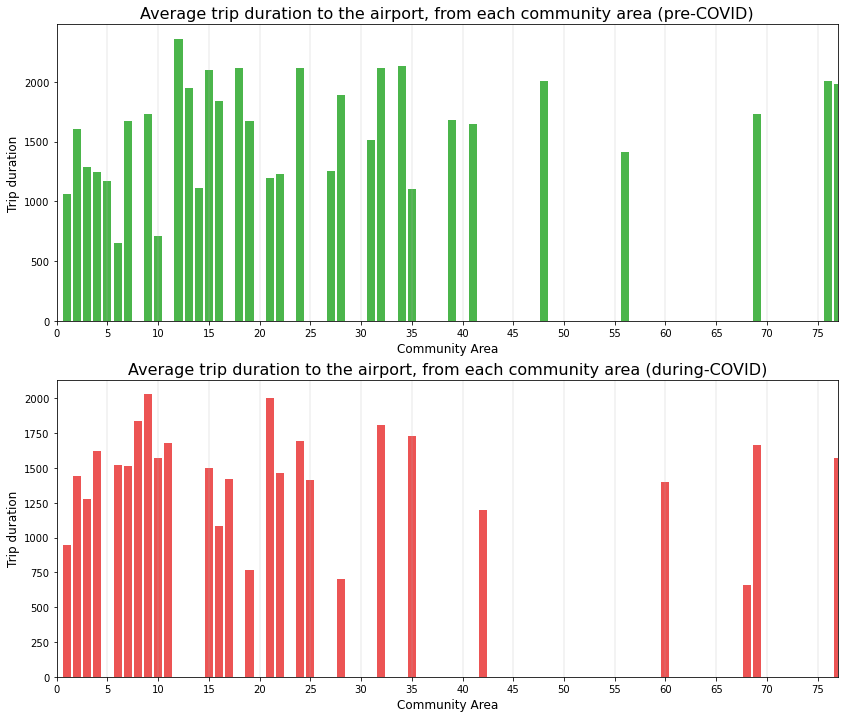

In [98]:
fig, (ax16,ax17) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(14)

ax16.bar(mean_seconds.Pickup_Community_Area, mean_seconds.Trip_Seconds, color='#4bb54b')
ax16.set_xlabel('Community Area', fontsize=12)
ax16.set_ylabel('Trip duration', fontsize=12)
ax16.set_title('Average trip duration to the airport, from each community area (pre-COVID)', fontsize = 16)
ax16.set_xlim(xmin=1, xmax = 77)
ax16.set_xticks(np.arange(0, 77, 5))
ax16.grid(axis='x', linewidth=0.3)

ax17.bar(mean_seconds2.Pickup_Community_Area, mean_seconds2.Trip_Seconds, color='#ec5454')
ax17.set_xlabel('Community Area', fontsize=12)
ax17.set_ylabel('Trip duration', fontsize=12)
ax17.set_title('Average trip duration to the airport, from each community area (during-COVID)', fontsize = 16)
ax17.set_xlim(xmin=1, xmax = 77)
ax17.set_xticks(np.arange(0, 77, 5))
ax17.grid(axis='x', linewidth=0.3)
plt.show()

In [99]:
mon_trips_carea=trips_carea[trips_carea.Weekday == 'Monday']
mon_trips_carea_copy = mon_trips_carea.copy()
mon_trips_carea_copy['Hour'] = mon_trips_carea_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

tue_trips_carea=trips_carea[trips_carea.Weekday == 'Tuesday']
tue_trips_carea_copy = tue_trips_carea.copy()
tue_trips_carea_copy['Hour'] = tue_trips_carea_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

wed_trips_carea=trips_carea[trips_carea.Weekday == 'Wednesday']
wed_trips_carea_copy = wed_trips_carea.copy()
wed_trips_carea_copy['Hour'] = wed_trips_carea_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

thu_trips_carea=trips_carea[trips_carea.Weekday == 'Thursday']
thu_trips_carea_copy = thu_trips_carea.copy()
thu_trips_carea_copy['Hour'] = thu_trips_carea_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

fri_trips_carea=trips_carea[trips_carea.Weekday == 'Friday']
fri_trips_carea_copy = fri_trips_carea.copy()
fri_trips_carea_copy['Hour'] = fri_trips_carea_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

sat_trips_carea=trips_carea[trips_carea.Weekday == 'Saturday']
sat_trips_carea_copy = sat_trips_carea.copy()
sat_trips_carea_copy['Hour'] = sat_trips_carea_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

sun_trips_carea=trips_carea[trips_carea.Weekday == 'Sunday']
sun_trips_carea_copy = sun_trips_carea.copy()
sun_trips_carea_copy['Hour'] = sun_trips_carea_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

In [100]:
mon_trips_carea_during=trips_carea_during[trips_carea_during.Weekday == 'Monday']
mon_trips_carea_during_copy = mon_trips_carea_during.copy()
mon_trips_carea_during_copy['Hour'] = mon_trips_carea_during_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

tue_trips_carea_during=trips_carea_during[trips_carea_during.Weekday == 'Tuesday']
tue_trips_carea_during_copy = tue_trips_carea_during.copy()
tue_trips_carea_during_copy['Hour'] = tue_trips_carea_during_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

wed_trips_carea_during=trips_carea_during[trips_carea_during.Weekday == 'Wednesday']
wed_trips_carea_during_copy = wed_trips_carea_during.copy()
wed_trips_carea_during_copy['Hour'] = wed_trips_carea_during_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

thu_trips_carea_during=trips_carea_during[trips_carea_during.Weekday == 'Thursday']
thu_trips_carea_during_copy = thu_trips_carea_during.copy()
thu_trips_carea_during_copy['Hour'] = thu_trips_carea_during_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

fri_trips_carea_during=trips_carea_during[trips_carea_during.Weekday == 'Friday']
fri_trips_carea_during_copy = fri_trips_carea_during.copy()
fri_trips_carea_during_copy['Hour'] = fri_trips_carea_during_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

sat_trips_carea_during=trips_carea_during[trips_carea_during.Weekday == 'Saturday']
sat_trips_carea_during_copy = sat_trips_carea_during.copy()
sat_trips_carea_during_copy['Hour'] = sat_trips_carea_during_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

sun_trips_carea_during=trips_carea_during[trips_carea_during.Weekday == 'Sunday']
sun_trips_carea_during_copy = sun_trips_carea_during.copy()
sun_trips_carea_during_copy['Hour'] = sun_trips_carea_during_copy['Trip_Start_Timestamp'].apply(lambda x: x.hour)

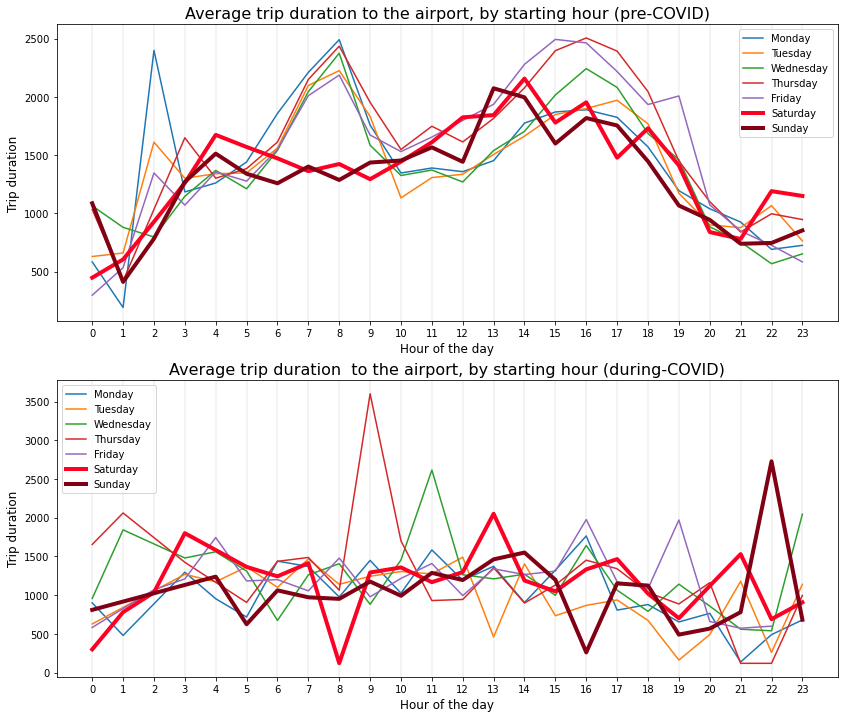

In [101]:
fig, (ax12,ax13) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(14)

ax12.plot(mon_trips_carea_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Monday')
ax12.plot(tue_trips_carea_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Tuesday')
ax12.plot(wed_trips_carea_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Wednesday')
ax12.plot(thu_trips_carea_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Thursday')
ax12.plot(fri_trips_carea_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Friday')
ax12.plot(sat_trips_carea_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Saturday', linewidth=4, color='#ff0025')
ax12.plot(sun_trips_carea_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Sunday', linewidth=4, color='#820013')
ax12.set_xlabel('Hour of the day', fontsize=12)
ax12.set_ylabel('Trip duration', fontsize=12)
ax12.set_title('Average trip duration to the airport, by starting hour (pre-COVID)', fontsize = 16)
ax12.set_xticks(np.arange(0, 24))
ax12.grid(axis='x', linewidth=0.3)
ax12.legend()

ax13.plot(mon_trips_carea_during_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Monday')
ax13.plot(tue_trips_carea_during_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Tuesday')
ax13.plot(wed_trips_carea_during_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Wednesday')
ax13.plot(thu_trips_carea_during_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Thursday')
ax13.plot(fri_trips_carea_during_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Friday')
ax13.plot(sat_trips_carea_during_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Saturday', linewidth=4, color='#ff0025')
ax13.plot(sun_trips_carea_during_copy.groupby('Hour')['Trip_Seconds'].mean(), label='Sunday', linewidth=4, color='#820013')
ax13.set_xlabel('Hour of the day', fontsize=12)
ax13.set_ylabel('Trip duration', fontsize=12)
ax13.set_title('Average trip duration  to the airport, by starting hour (during-COVID)', fontsize = 16)
ax13.set_xticks(np.arange(0, 24))
ax13.grid(axis='x', linewidth=0.3)
ax13.legend()
plt.show()

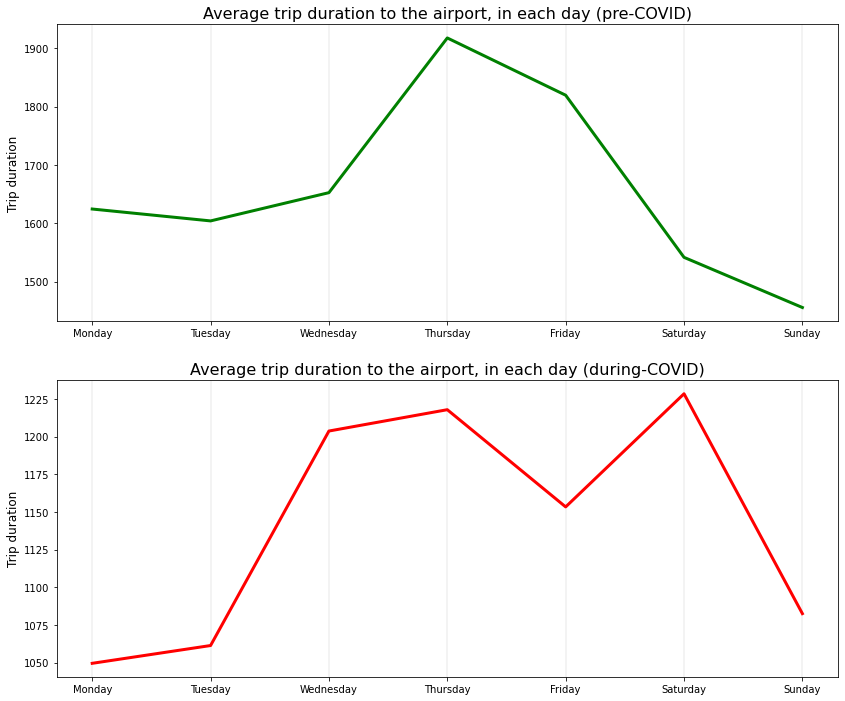

In [102]:
fig, (ax14,ax15) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(14)

ax14.plot(trips_carea.groupby('Weekday')['Trip_Seconds'].mean().reindex(days), linewidth=3, color='g')
ax14.set_ylabel('Trip duration', fontsize=12)
ax14.set_title('Average trip duration to the airport, in each day (pre-COVID)', fontsize = 16)
ax14.grid(axis='x', linewidth=0.3)

ax15.plot(trips_carea_during.groupby('Weekday')['Trip_Seconds'].mean().reindex(days), linewidth=3, color='r')
ax15.set_ylabel('Trip duration', fontsize=12)
ax15.set_title('Average trip duration to the airport, in each day (during-COVID)', fontsize = 16)
ax15.grid(axis='x', linewidth=0.3)
plt.show()

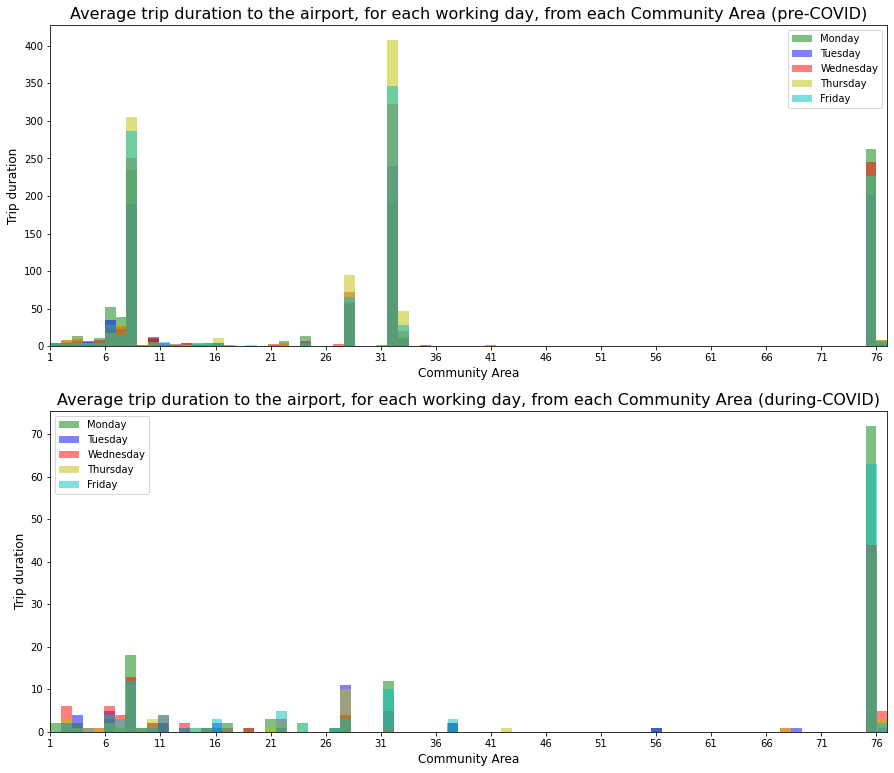

In [103]:
fig, (ax18,ax19) = plt.subplots(2,1)
fig.set_figheight(13)
fig.set_figwidth(15)

ax18.hist(trips_carea[trips_carea.Weekday == 'Monday'].Pickup_Community_Area, bins = 77, color='g', alpha=0.5, label='Monday')
ax18.hist(trips_carea[trips_carea.Weekday == 'Tuesday'].Pickup_Community_Area, bins = 77, color='b', alpha=0.5, label='Tuesday')
ax18.hist(trips_carea[trips_carea.Weekday == 'Wednesday'].Pickup_Community_Area, bins = 77, color='r', alpha=0.5, label='Wednesday')
ax18.hist(trips_carea[trips_carea.Weekday == 'Thursday'].Pickup_Community_Area, bins = 77, color='y', alpha=0.5, label='Thursday')
ax18.hist(trips_carea[trips_carea.Weekday == 'Friday'].Pickup_Community_Area, bins = 77, color='c', alpha=0.5, label='Friday')
ax18.set_xlabel('Community Area', fontsize=12)
ax18.set_ylabel('Trip duration', fontsize=12)
ax18.set_title('Average trip duration to the airport, for each working day, from each Community Area (pre-COVID)', fontsize = 16)
ax18.set_xlim(xmin=1, xmax = 77)
ax18.set_xticks(np.arange(1, 77, 5))
ax18.legend()

ax19.hist(trips_carea_during[trips_carea_during.Weekday == 'Monday'].Pickup_Community_Area, bins = 77, color='g', alpha=0.5, label='Monday')
ax19.hist(trips_carea_during[trips_carea_during.Weekday == 'Tuesday'].Pickup_Community_Area, bins = 77, color='b', alpha=0.5, label='Tuesday')
ax19.hist(trips_carea_during[trips_carea_during.Weekday == 'Wednesday'].Pickup_Community_Area, bins = 77, color='r', alpha=0.5, label='Wednesday')
ax19.hist(trips_carea_during[trips_carea_during.Weekday == 'Thursday'].Pickup_Community_Area, bins = 77, color='y', alpha=0.5, label='Thursday')
ax19.hist(trips_carea_during[trips_carea_during.Weekday == 'Friday'].Pickup_Community_Area, bins = 77, color='c', alpha=0.5, label='Friday')
ax19.set_xlabel('Community Area', fontsize=12)
ax19.set_ylabel('Trip duration', fontsize=12)
ax19.set_title('Average trip duration to the airport, for each working day, from each Community Area (during-COVID)', fontsize = 16)
ax19.set_xlim(xmin=1, xmax = 77)
ax19.set_xticks(np.arange(1, 77, 5))
ax19.legend()
plt.show()

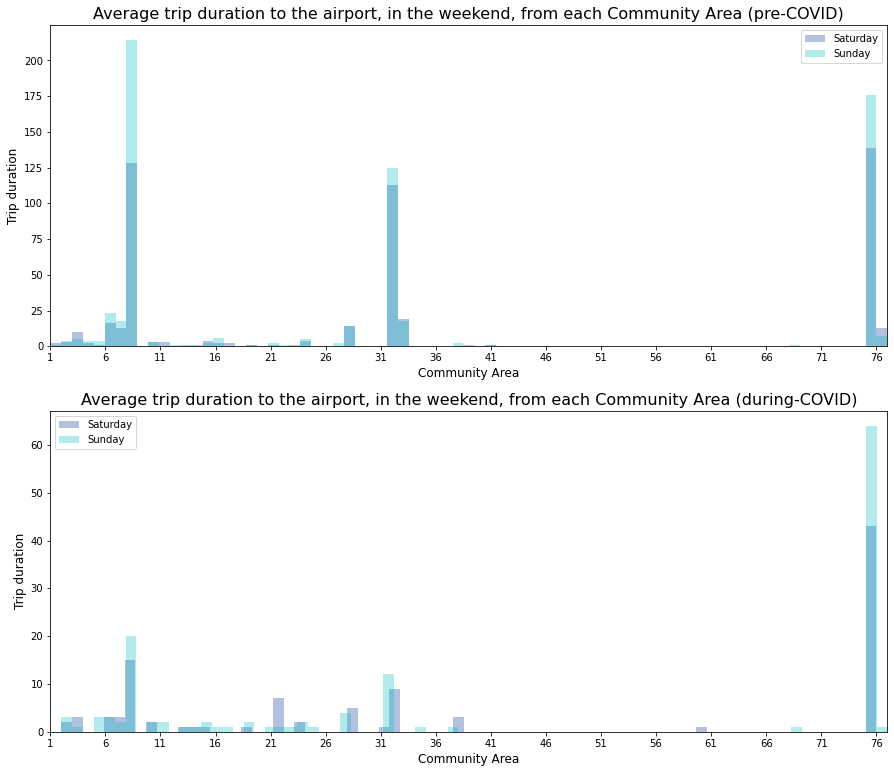

In [104]:
fig, (ax18,ax19) = plt.subplots(2,1)
fig.set_figheight(13)
fig.set_figwidth(15)

ax18.hist(trips_carea[trips_carea.Weekday == 'Saturday'].Pickup_Community_Area, bins = 77, color='#093099', alpha=0.3, label='Saturday')
ax18.hist(trips_carea[trips_carea.Weekday == 'Sunday'].Pickup_Community_Area, bins = 77, color='c', alpha=0.3, label='Sunday')
ax18.set_xlabel('Community Area', fontsize=12)
ax18.set_ylabel('Trip duration', fontsize=12)
ax18.set_title('Average trip duration to the airport, in the weekend, from each Community Area (pre-COVID)', fontsize = 16)
ax18.set_xlim(xmin=1, xmax = 77)
ax18.set_xticks(np.arange(1, 77, 5))
ax18.legend()

ax19.hist(trips_carea_during[trips_carea_during.Weekday == 'Saturday'].Pickup_Community_Area, bins = 77, color='#093099', alpha=0.3, label='Saturday')
ax19.hist(trips_carea_during[trips_carea_during.Weekday == 'Sunday'].Pickup_Community_Area, bins = 77, color='c', alpha=0.3, label='Sunday')
ax19.set_xlabel('Community Area', fontsize=12)
ax19.set_ylabel('Trip duration', fontsize=12)
ax19.set_title('Average trip duration to the airport, in the weekend, from each Community Area (during-COVID)', fontsize = 16)
ax19.set_xlim(xmin=1, xmax = 77)
ax19.set_xticks(np.arange(1, 77, 5))
ax19.legend()
plt.show()

## PREDICTION

Let's normalize the features.

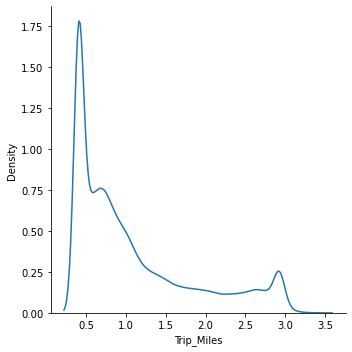

In [105]:
taxi['Trip_Miles'] = np.log1p(taxi['Trip_Miles'])
sns.displot(taxi['Trip_Miles'], kind="kde")

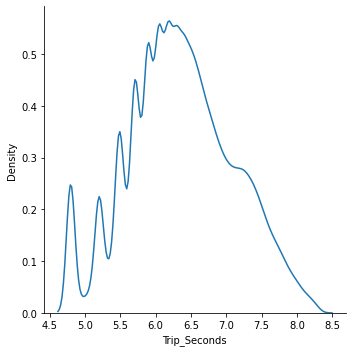

In [106]:
taxi['Trip_Seconds'] = np.log1p(taxi['Trip_Seconds'])
sns.displot(taxi['Trip_Seconds'], kind="kde")

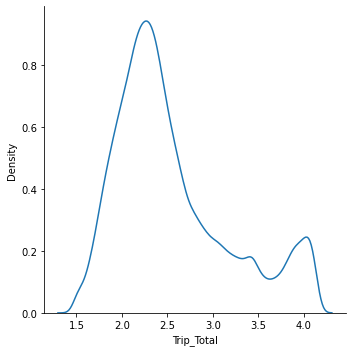

In [107]:
taxi['Trip_Total'] = np.log1p(taxi['Trip_Total'])
sns.displot(taxi['Trip_Total'], kind="kde")

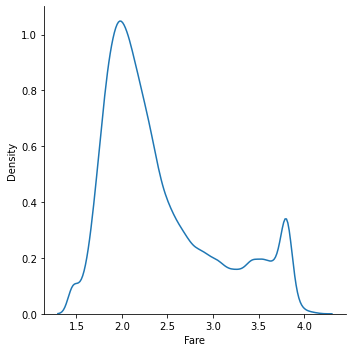

In [108]:
taxi['Fare'] = np.log1p(taxi['Fare'])
sns.displot(taxi['Fare'], kind="kde")

## Linear Regression (full dataset)

Duration prediction starting from **only Trip_Miles.**

In [109]:
target_variable = 'Trip_Seconds'
input_variable = 'Trip_Miles'

In [110]:
X = taxi[input_variable].values.reshape(-1, 1)
y = taxi[target_variable].values.reshape(-1, 1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

In [112]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
y_pred = lr1.predict(X_test)

lr1_score = cross_val_score(lr1,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=5846))
print("Score %.3f +/- %.3f"%(lr1_score.mean(),lr1_score.std()))

Score 0.516 +/- 0.005


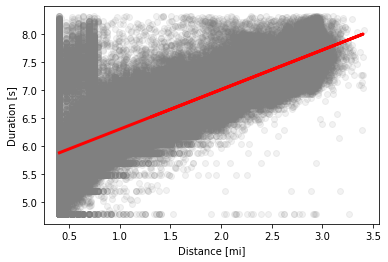

In [113]:
plt.scatter(X_train, y_train,  color='gray', alpha=0.1);
plt.plot(X_test, y_pred, color='red', linewidth=3);
plt.xlabel('Distance [mi]');
plt.ylabel('Duration [s]');
plt.show()

The model performance is pretty poor. That's due to the fact that predicting the trip duration knowing only the distance covered is not not enough. Traffic (speed) variability is really unpredictable.

### LR: Pre-COVID

Score 0.561 +/- 0.017


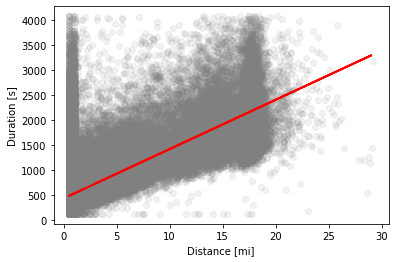

In [114]:
X = taxi_pre_covid[input_variable].values.reshape(-1, 1)
y = taxi_pre_covid[target_variable].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

lr1 = LinearRegression()
lr1.fit(X_train,y_train)
y_pred = lr1.predict(X_test)
lr1_score = cross_val_score(lr1,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=5846))
print("Score %.3f +/- %.3f"%(lr1_score.mean(),lr1_score.std()))

plt.scatter(X_train, y_train,  color='gray', alpha=0.1);
plt.plot(X_test, y_pred, color='red', linewidth=2);
plt.xlabel('Distance [mi]');
plt.ylabel('Duration [s]');
plt.show()

### LR: During-COVID

Score 0.388 +/- 0.021


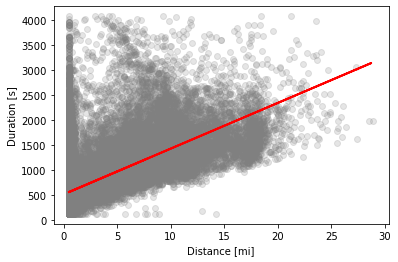

In [115]:
X = taxi_during_covid[input_variable].values.reshape(-1, 1)
y = taxi_during_covid[target_variable].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

lr1 = LinearRegression()
lr1.fit(X_train,y_train)
y_pred = lr1.predict(X_test)
lr1_score = cross_val_score(lr1,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=5846))
print("Score %.3f +/- %.3f"%(lr1_score.mean(),lr1_score.std()))
plt.scatter(X_train, y_train,  color='gray', alpha=0.2);
plt.plot(X_test, y_pred, color='red', linewidth=2);
plt.xlabel('Distance [mi]');
plt.ylabel('Duration [s]');
plt.show()

* Performance slightly **improves** considering only pre-COVID trips.
* We have a **reduction of the model performance** in during-COVID time due to smaller amounts of data.

### Multiple Linear regression (full datatset)

In [116]:
target_variable = 'Trip_Seconds'
input_variables = taxi.columns[(taxi.columns == 'Trip_Miles') | (taxi.columns == 'Fare')]

In [117]:
X = taxi[input_variables].reindex()
y = taxi[target_variable].reindex()

**We add Fare** since, being strong correlated to Trip distance and Trip Duration, it would allow a more accurate prediction.

We did not consider **Tips, Extras and Tolls** because the first is really subjective, the nature of the second is not clear and the third is basically always zero.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

In [119]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train)
y_pred = lr2.predict(X_test)
lr2_score = cross_val_score(lr2,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Score %.5f +/- %.5f"%(lr2_score.mean(),lr2_score.std()))

Score 0.79448 +/- 0.00716


**Performance has really improved** since the Fare generation linearly depends to the duration: Fare = 0.20/36s + 3.25

### Multiple LR: pre-COVID

In [120]:
target_variable = 'Trip_Seconds'
input_variables = taxi_pre_covid.columns[(taxi_pre_covid.columns == 'Trip_Miles') | (taxi_pre_covid.columns == 'Fare')]

X = taxi_pre_covid[input_variables].reindex()
y = taxi_pre_covid[target_variable].reindex()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

lr2 = LinearRegression()
lr2.fit(X_train,y_train)
y_pred = lr2.predict(X_test)
lr2_score = cross_val_score(lr2,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Score %.5f +/- %.5f"%(lr2_score.mean(),lr2_score.std()))

Score 0.76331 +/- 0.00778


The model **improved** using Fare. 

### Multiple LR: during-COVID

In [121]:
target_variable = 'Trip_Seconds'
input_variables = taxi_during_covid.columns[(taxi_during_covid.columns == 'Trip_Miles') | (taxi_during_covid.columns == 'Fare')]

X = taxi_during_covid[input_variables].reindex()
y = taxi_during_covid[target_variable].reindex()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

lr2 = LinearRegression()
lr2.fit(X_train,y_train)
y_pred = lr2.predict(X_test)
lr2_score = cross_val_score(lr2,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Score %.5f +/- %.5f"%(lr2_score.mean(),lr2_score.std()))

Score 0.69595 +/- 0.02116


Again, the model **improved** using Fare.

#### LassoCV

In [122]:
lcv1 = LassoCV()
lcv1.fit(X_train,y_train)
y_pred = lcv1.predict(X_test)
lcv1_score = cross_val_score(lcv1,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Score %.5f +/- %.5f"%(lcv1_score.mean(),lcv1_score.std()))

Score 0.69592 +/- 0.02090


It produced the same performance as before.

#### RidgeCV

In [123]:
rcv1 = RidgeCV()
rcv1.fit(X_train,y_train)
y_pred = rcv1.predict(X_test)
rcv1_score = cross_val_score(rcv1,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Score %.5f +/- %.5f"%(rcv1_score.mean(),rcv1_score.std()))

Score 0.69595 +/- 0.02116


Again, it produced the same perfomance as before.

### Adding other features

#### 1. Quadratic or higher version of the distance

In [124]:
target_variable = 'Trip_Seconds'
input_variables = 'Trip_Miles'

X = pd.DataFrame(taxi[input_variables].values.reshape(-1, 1))
y = taxi[target_variable].values.reshape(-1, 1)

In [125]:
r2 = []
degree = 29 #must be >=2
for d in range(2,degree):
    n = X.iloc[:,0].apply(lambda x: x**d)
    X = pd.concat([X, n], axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    lr_score = cross_val_score(lr,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
    #print("Degree "+str(d)+" : score %.3f +/- %.3f \n"%(lr_score.mean(),lr_score.std()))
    r2.append(lr_score.mean())

Text(0, 0.5, 'R2')

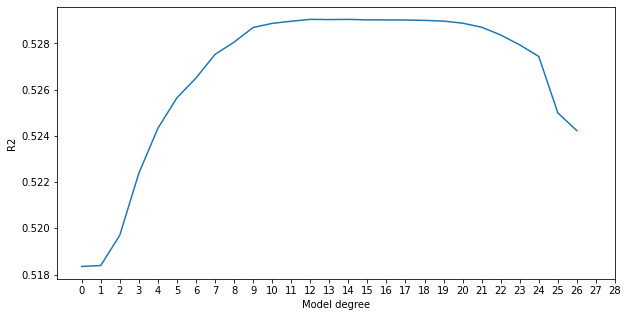

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(r2)
plt.xlabel('Model degree')
plt.xticks(range(0,degree))
plt.ylabel('R2')

A ninth degree regression seems to yield the best perfomance of R2.  For higher degree we are probably running into overfitting.

However, we think that a polynomial regression when trying to predict the duration starting from the distance is not appropriate because the Distance-Duration relation is essentially linear.

#### 2. Weekday

In [127]:
def encode(day):
    if(day == 'Monday'):
        return 0
    if(day == 'Tuesday'):
        return 1
    if(day == 'Wednesday'):
        return 2
    if(day == 'Thursday'):
        return 3
    if(day == 'Friday'):
        return 4
    if(day == 'Saturday'):
        return 5
    if(day == 'Sunday'):
        return 6
    else:
        print(day)
        raise Exception('Valore n.d.')

In [128]:
target_variable_2 = 'Trip_Seconds'
input_variables_2 = ['Trip_Miles','Fare','Weekday_encoded']

temp = taxi.filter(['Trip_Seconds','Trip_Miles','Fare','Weekday'], axis = 1)

In [129]:
temp['Weekday_encoded'] =  temp['Weekday'].apply(lambda x: encode(x))

In [130]:
X = temp[input_variables_2]
y = temp[target_variable_2]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

In [132]:
lr4 = LinearRegression()
lr4.fit(X_train,y_train)
y_pred = lr4.predict(X_test)
lr4_score = cross_val_score(lr4,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Score %.3f +/- %.3f"%(lr4_score.mean(),lr4_score.std()))

Score 0.795 +/- 0.007


The model does not improve.

#### 3. Time of the day

In [133]:
target_variable = 'Trip_Seconds'
input_variables = ['Trip_Miles', 'Fare', 'Trip_Start_Timestamp', 'Trip_End_Timestamp']

In [134]:
temp2 = taxi.filter(['Trip_Seconds','Fare','Trip_Miles','Trip_Start_Timestamp', 'Trip_End_Timestamp'], axis = 1)

temp2['Trip_Start_Timestamp'] = temp2['Trip_Start_Timestamp'].apply(lambda x: x.hour)
temp2['Trip_End_Timestamp'] = temp2['Trip_End_Timestamp'].apply(lambda x: x.hour)

In [135]:
def encode2(h):
    if(6 <= int(h)<=12): #morning
        return 0
    if(13 <= int(h)<=18):  #afternoon
        return 1
    if(19 <= int(h)<=21):  #evening
        return 2
    if((int(h) == 22)|(int(h) == 23)|(int(h) == 0)|(int(h) == 1)|(int(h) == 2)|(int(h) == 3)|(int(h) == 4)|(int(h) == 5)): #night
        return 3    
    else:
        raise Exception('Value n.d.')

In [136]:
temp2['Trip_Start_Timestamp'] = temp2['Trip_Start_Timestamp'].apply(lambda x: encode2(x))
temp2['Trip_End_Timestamp'] = temp2['Trip_End_Timestamp'].apply(lambda x: encode2(x))

In [137]:
X = temp2[input_variables]
y = temp2[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

lr5 = LinearRegression()
lr5.fit(X_train,y_train)
y_pred = lr5.predict(X_test)
lr5_score = cross_val_score(lr5,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Score %.5f +/- %.5f"%(lr5_score.mean(),lr5_score.std()))

Score 0.79785 +/- 0.00722


The model does improve a bit.

#### 4. Weather

In [138]:
target_variable = 'Trip_Seconds'
input_variables = ['Trip_Miles','Fare','weather_condition']

In [139]:
def weather_encoder(x):
    if(x =="rain or snow"):
        return 0
    if(x == "fog"):
        return 1
    if(x == "thunder"):
        return 2
    if(x == "sunny but some wind"):
        return 3
    if(x == "good weather"):
        return 4
    else:
        print(x)
        raise Exception("Value n.d.")

In [140]:
temp2 = taxi.filter(['Trip_Seconds','Fare','Trip_Miles','weather_condition'], axis = 1)
temp2['weather_condition'] = temp2['weather_condition'].apply(lambda x: weather_encoder(x))

In [141]:
X = temp2[input_variables]
y = temp2[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234)

lr5 = LinearRegression()
lr5.fit(X_train,y_train)
y_pred = lr5.predict(X_test)
lr5_score = cross_val_score(lr5,X_test,y_test,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Score %.5f +/- %.5f"%(lr5_score.mean(),lr5_score.std()))

Score 0.79448 +/- 0.00715


The model does not improve.

### CLASSIFICATION

## Which features are important for predicting payment type?

### 1) Trip miles?

We start the classification using Trip_Miles as the input variable.

In [142]:
target_variable = 'Payment_Type'
input_variable = 'Trip_Miles'

X = taxi[input_variable].values.reshape(-1, 1)
y = taxi[target_variable].values.reshape(-1, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234, shuffle = True)

#### 1.1) Logistic Regression

Accuracy 0.486
Precision 0.424
Recall 0.486


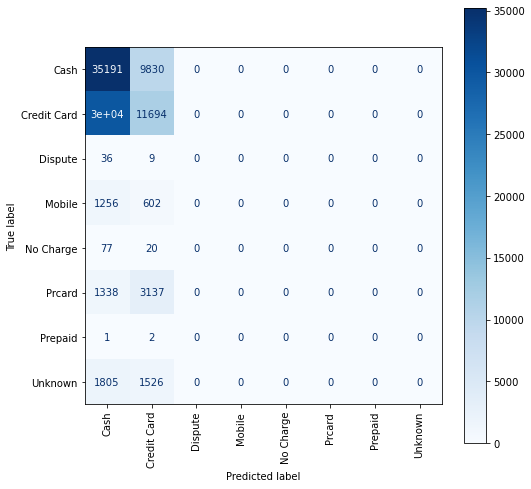

Wall time: 17.3 s


In [143]:
%%time
lr = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', max_iter=500)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

In [144]:
%%time
lr_acc = cross_val_score(lr, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(lr_acc.mean(), lr_acc.std()))

Accuracy from Crossvalidation mean = 0.486 std = 0.003
Wall time: 15 s


#### 1.2) Naive Bayes

Accuracy 0.488
Precision 0.424
Recall 0.488


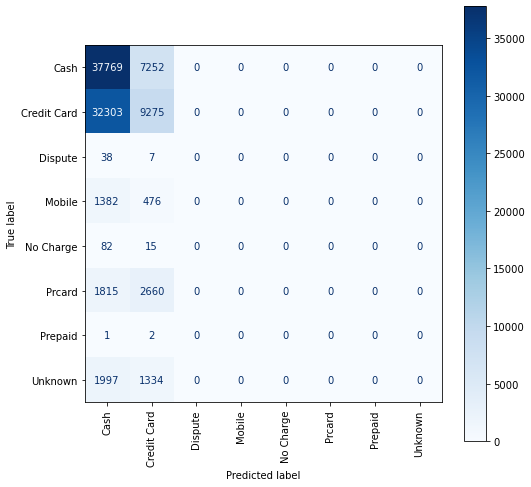

Wall time: 1.63 s


In [145]:
%%time
nb = GaussianNB()

nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(nb, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

In [146]:
%%time
nb_acc = cross_val_score(nb, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(nb_acc.mean(), nb_acc.std()))

Accuracy from Crossvalidation mean = 0.488 std = 0.001
Wall time: 332 ms


#### 1.3) Random Forest

Accuracy 0.506
Precision 0.489
Recall 0.506


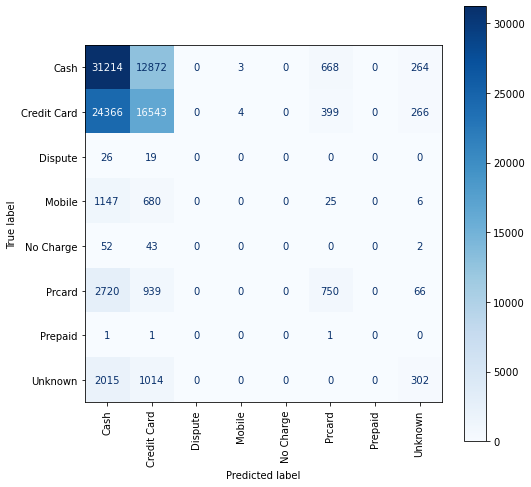

Wall time: 12.6 s


In [147]:
%%time
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [148]:
%%time
rf_acc = cross_val_score(rf, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(rf_acc.mean(), rf_acc.std()))

Accuracy from Crossvalidation mean = 0.500 std = 0.002
Wall time: 9.11 s


#### 1.4) AdaBoost

Accuracy 0.499
Precision 0.455
Recall 0.499


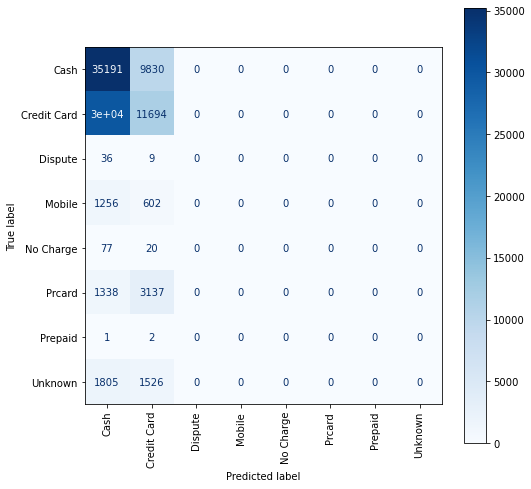

Wall time: 14.4 s


In [149]:
%%time
ab = AdaBoostClassifier()

ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

In [150]:
%%time
ab_acc = cross_val_score(ab, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(ab_acc.mean(), ab_acc.std()))

Accuracy from Crossvalidation mean = 0.497 std = 0.003
Wall time: 12.2 s


#### 1.5) XGBoost

Accuracy 0.507
Precision 0.496
Recall 0.507


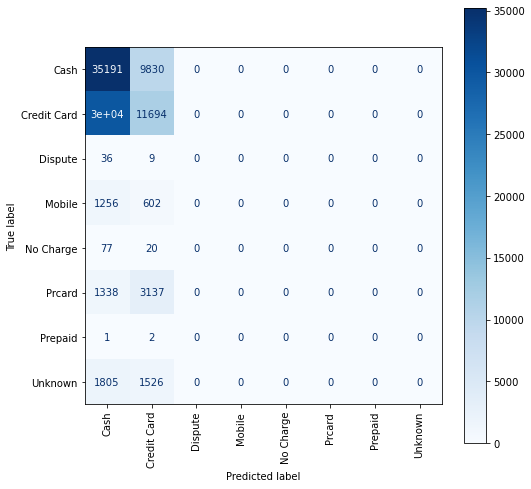

Wall time: 12.1 s


In [151]:
%%time
model = xgb.XGBClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [152]:
%%time
xgb_acc = cross_val_score(model, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(xgb_acc.mean(), xgb_acc.std()))

Accuracy from Crossvalidation mean = 0.506 std = 0.002
Wall time: 10.6 s


The best model is XGBoost followed by Random Forest. Logistic Regression and Naive Bayes are similar.

### 2) Trip total?

We now use a different input variable (Trip_Total) to see how it affects the score of different models.

In [153]:
target_variable = 'Payment_Type'
input_variable = 'Trip_Total'

X = taxi[input_variable].values.reshape(-1, 1)
y = taxi[target_variable].values.reshape(-1, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234, shuffle = True)

#### 2.1) Logistic Regression

Accuracy 0.539
Precision 0.479
Recall 0.539


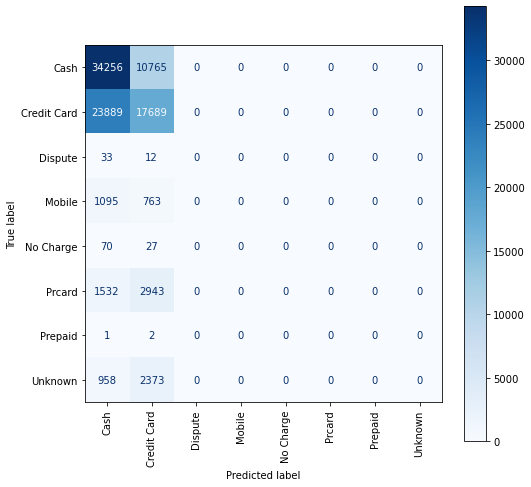

Wall time: 22.4 s


In [154]:
%%time
lr = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', max_iter=1000)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [155]:
%%time
lr_acc = cross_val_score(lr, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(lr_acc.mean(), lr_acc.std()))

Accuracy from Crossvalidation mean = 0.539 std = 0.002
Wall time: 42.5 s


#### 2.2) Naive Bayes

Accuracy 0.524
Precision 0.465
Recall 0.524


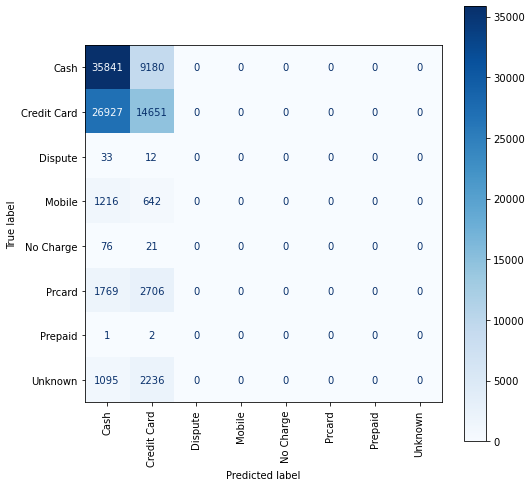

Wall time: 1.69 s


In [156]:
%%time
nb = GaussianNB()

nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(nb, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [157]:
%%time
nb_acc = cross_val_score(nb, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(nb_acc.mean(), nb_acc.std()))

Accuracy from Crossvalidation mean = 0.524 std = 0.002
Wall time: 335 ms


#### 2.3) Random Forest

Accuracy 0.653
Precision 0.631
Recall 0.653


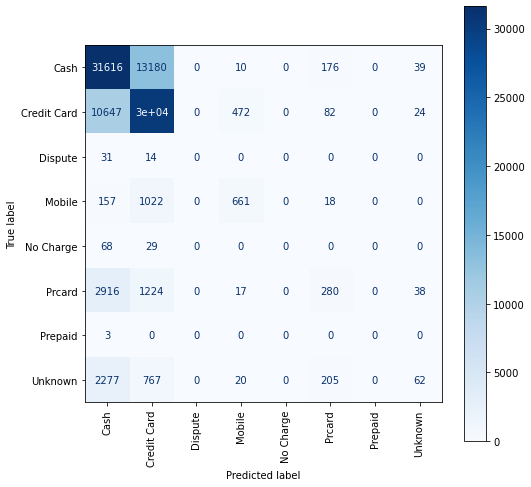

Wall time: 13.6 s


In [158]:
%%time
rf = RandomForestClassifier() 

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [159]:
%%time
rf_acc = cross_val_score(rf, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(rf_acc.mean(), rf_acc.std()))

Accuracy from Crossvalidation mean = 0.651 std = 0.001
Wall time: 8.79 s


#### 2.4) AdaBoost

Accuracy 0.600
Precision 0.547
Recall 0.600


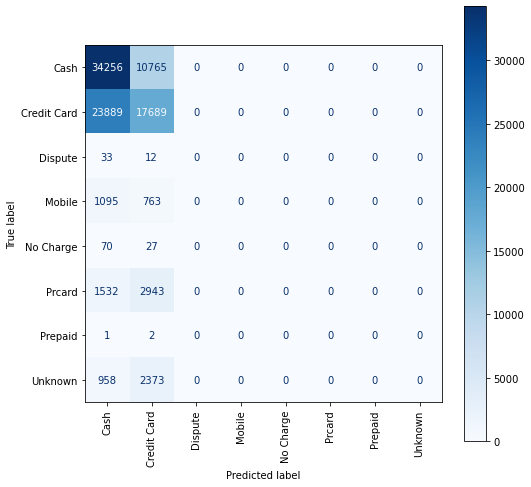

Wall time: 15.2 s


In [160]:
%%time
ab = AdaBoostClassifier()

ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax = ax)
plt.show()

In [161]:
%%time
ab_acc = cross_val_score(ab, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(ab_acc.mean(), ab_acc.std()))

Accuracy from Crossvalidation mean = 0.595 std = 0.003
Wall time: 12.5 s


#### 2.5) XGBoost

Accuracy 0.647
Precision 0.625
Recall 0.647


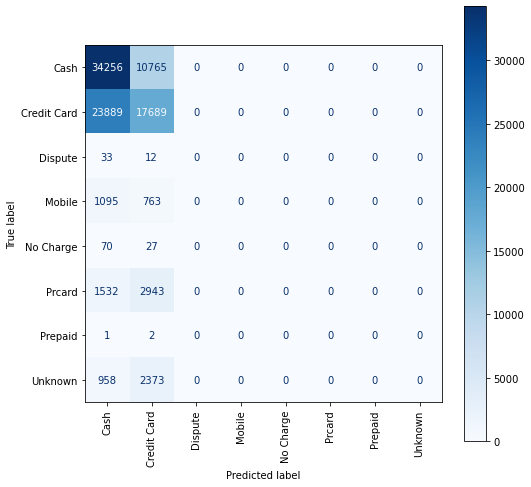

Wall time: 13.7 s


In [162]:
%%time
model = xgb.XGBClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [163]:
%%time
xgb_acc = cross_val_score(model, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(xgb_acc.mean(), xgb_acc.std()))

Accuracy from Crossvalidation mean = 0.645 std = 0.001
Wall time: 11.6 s


The best model is **Random Forest** followed by AdaBoost and XGBoost. In the end we have Logistic Regression and Naive Bayes that are similar.

### 3) Pickup Area?

Now we consider the Pickup Area as input variable.

In [164]:
target_variable = 'Payment_Type'
input_variable = 'Pickup_Community_Area'

X = taxi[input_variable].values.reshape(-1, 1)
y = taxi[target_variable].values.reshape(-1, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234, shuffle = True)

#### 3.1) Logistic Regression

Accuracy 0.478
Precision 0.409
Recall 0.478


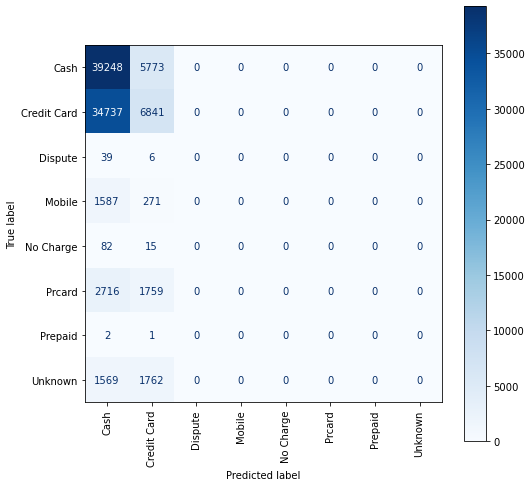

Wall time: 57.7 s


In [165]:
%%time
lr = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', max_iter=1000)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [166]:
%%time
lr_acc = cross_val_score(nb, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(lr_acc.mean(), lr_acc.std()))

Accuracy from Crossvalidation mean = 0.481 std = 0.000
Wall time: 328 ms


#### 3.2) Naive Bayes

Accuracy 0.481
Precision 0.420
Recall 0.481


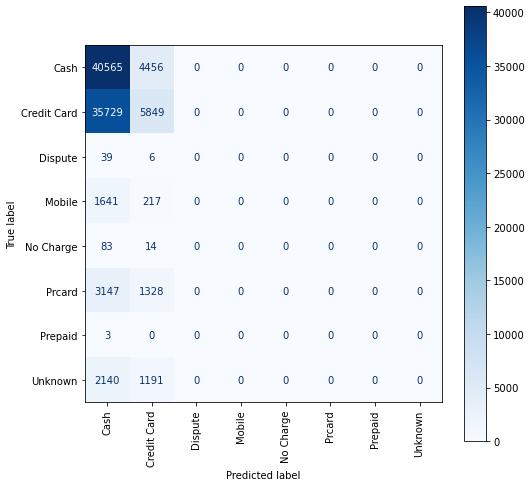

Wall time: 1.59 s


In [167]:
%%time
nb = GaussianNB()

nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(nb, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [168]:
%%time
nb_acc = cross_val_score(nb, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(nb_acc.mean(), nb_acc.std()))

Accuracy from Crossvalidation mean = 0.481 std = 0.000
Wall time: 327 ms


#### 3.3) Random Forest

Accuracy 0.527
Precision 0.513
Recall 0.527


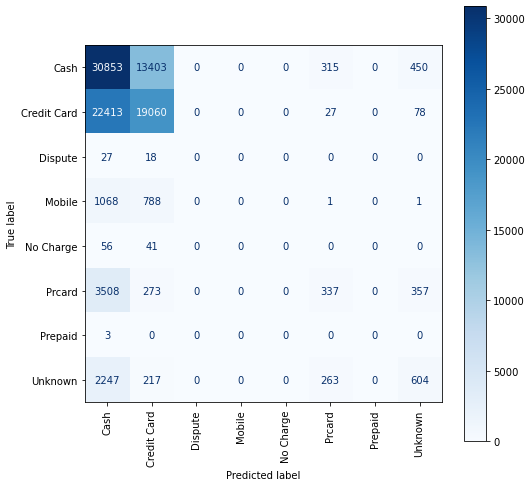

Wall time: 5.73 s


In [169]:
%%time
rf = RandomForestClassifier() 

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [170]:
%%time
rf_acc = cross_val_score(rf, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(rf_acc.mean(), rf_acc.std()))

Accuracy from Crossvalidation mean = 0.528 std = 0.000
Wall time: 3.21 s


#### 3.4) AdaBoost

Accuracy 0.504
Precision 0.451
Recall 0.504


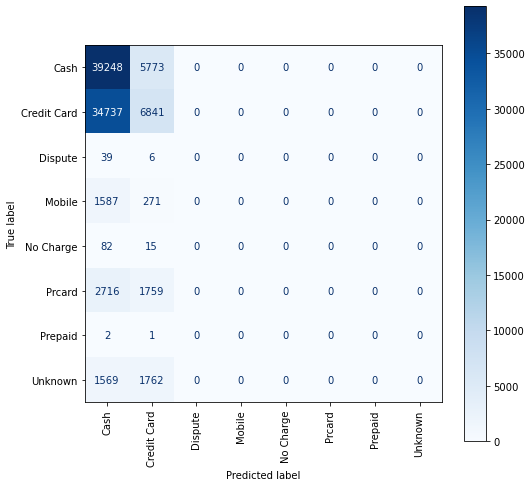

Wall time: 14.7 s


In [171]:
%%time
ab = AdaBoostClassifier()

ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax = ax)
plt.show()

In [172]:
%%time
ab_acc = cross_val_score(ab, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(ab_acc.mean(), ab_acc.std()))

Accuracy from Crossvalidation mean = 0.498 std = 0.022
Wall time: 12.5 s


#### 3.5) XGBoost

Accuracy 0.527
Precision 0.513
Recall 0.527


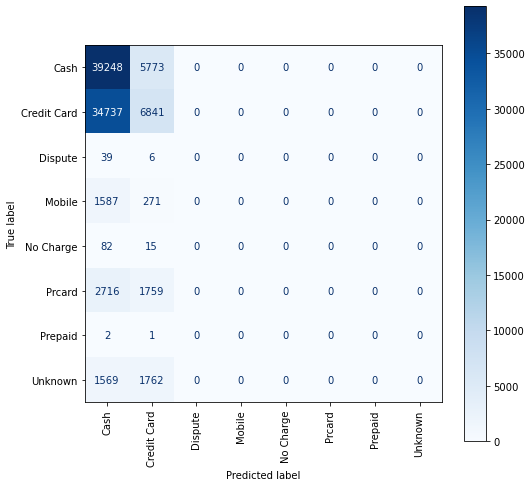

Wall time: 11.3 s


In [173]:
%%time
model = xgb.XGBClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)
plt.show()

In [174]:
%%time
xgb_acc = cross_val_score(model, X_test,y_test, cv = StratifiedKFold(n_splits=3, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(xgb_acc.mean(), xgb_acc.std()))

Accuracy from Crossvalidation mean = 0.528 std = 0.000
Wall time: 10.2 s


All models' scores are quite low, because Pickup Community Area and Payment Type are not strictly correlated.

Among all the input variables considerated, **Trip_Total** is the most suitable one to predict the payment type.

In order to improve performances we try to analyze the dataset focusing only on the **pre-COVID period.**

**We focus on Trip_Total** as input variable since, before, it gave us the best results.

### Trip Total (pre-COVID)

In [175]:
target_variable = 'Payment_Type'
input_variable = 'Trip_Total'

X = taxi_pre_covid[input_variable].values.reshape(-1, 1)
y = taxi_pre_covid[target_variable].values.reshape(-1, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1234, shuffle = True)

#### 1) Logistic Regression (pre-COVID)

Accuracy 0.548
Precision 0.534
Recall 0.548


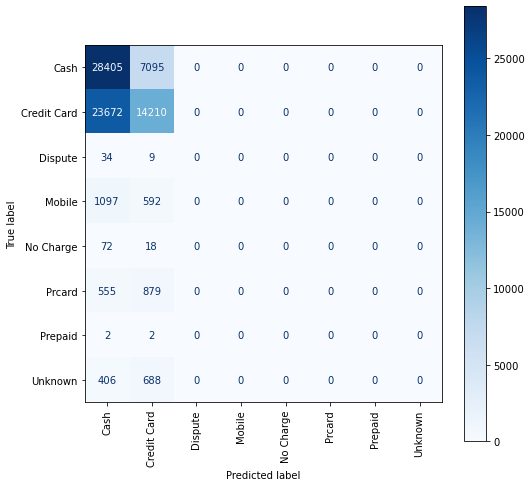

Wall time: 30.7 s


In [176]:
%%time
lr = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', max_iter=2000)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

In [177]:
%%time
lr_acc = cross_val_score(lr, X_test,y_test, cv = StratifiedKFold(n_splits=4, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(lr_acc.mean(), lr_acc.std()))

Accuracy from Crossvalidation mean = 0.552 std = 0.002
Wall time: 1min 11s


#### 2) Naive Bayes (pre-COVID)

Accuracy 0.518
Precision 0.530
Recall 0.518


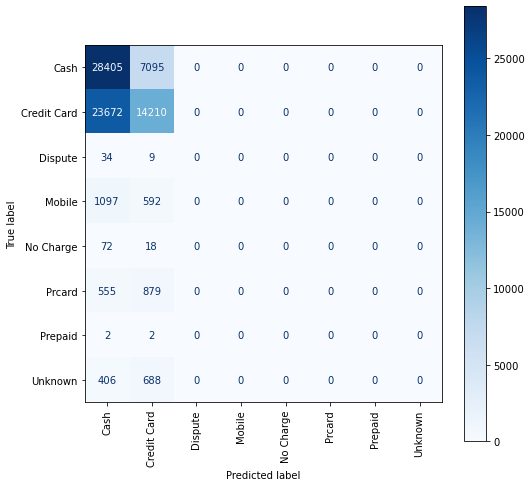

Wall time: 1.43 s


In [178]:
%%time
nb = GaussianNB()

nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

In [179]:
%%time
nb_acc = cross_val_score(nb, X_test,y_test, cv = StratifiedKFold(n_splits=4, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(nb_acc.mean(), nb_acc.std()))

Accuracy from Crossvalidation mean = 0.517 std = 0.002
Wall time: 338 ms


#### 3) Random Forest (pre-COVID)

Accuracy 0.688
Precision 0.681
Recall 0.688


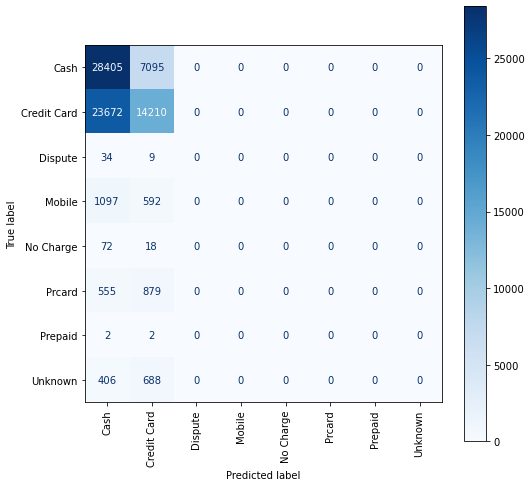

Wall time: 10.7 s


In [180]:
%%time
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

In [181]:
%%time
rf_acc = cross_val_score(rf, X_test,y_test, cv = StratifiedKFold(n_splits=4, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(rf_acc.mean(), rf_acc.std()))

Accuracy from Crossvalidation mean = 0.686 std = 0.001
Wall time: 10.6 s


#### 4) AdaBoost (pre-COVID)

Accuracy 0.654
Precision 0.648
Recall 0.654


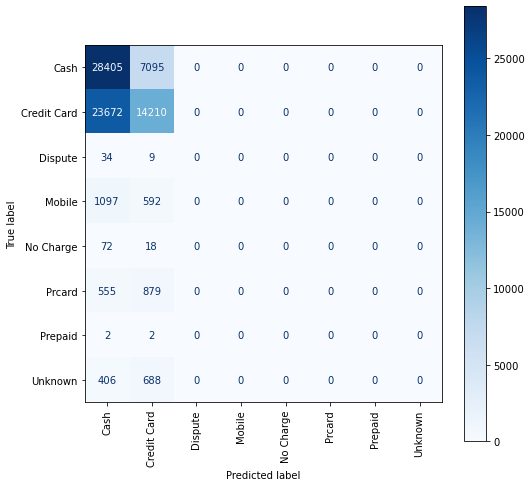

Wall time: 12.1 s


In [182]:
%%time
ab = AdaBoostClassifier()

ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, xticks_rotation='vertical',ax=ax)
plt.show()

In [183]:
%%time
ab_acc = cross_val_score(ab, X_test,y_test, cv = StratifiedKFold(n_splits=4, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(ab_acc.mean(), ab_acc.std()))

Accuracy from Crossvalidation mean = 0.641 std = 0.007
Wall time: 14.7 s


#### 5) XGBoost (pre-COVID)

Accuracy 0.682
Precision 0.693
Recall 0.682


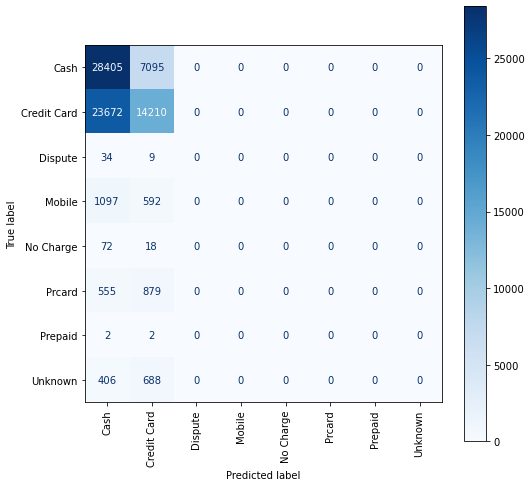

Wall time: 11 s


In [184]:
%%time
model = xgb.XGBClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy %.3f"%(accuracy_score(y_test, y_pred)))
print("Precision %.3f"%precision_score(y_test, y_pred, average = 'weighted', zero_division=0))
print("Recall %.3f"%recall_score(y_test, y_pred, average = 'weighted'))

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues,xticks_rotation='vertical', ax=ax)
plt.show()

In [185]:
%%time
xgb_acc = cross_val_score(model, X_test,y_test, cv = StratifiedKFold(n_splits=4, shuffle=True, random_state = 1234))
print("Accuracy from Crossvalidation mean = %.3f std = %.3f" %(xgb_acc.mean(), xgb_acc.std()))

Accuracy from Crossvalidation mean = 0.679 std = 0.000
Wall time: 16.7 s


**Random Forest** provides the best results of all the models we have tried.

We can see that, analizing only the **pre-COVID** period, the results improve a little in all the models. That's because this period has a more homogeneous distribution of data trips.

### Stacking

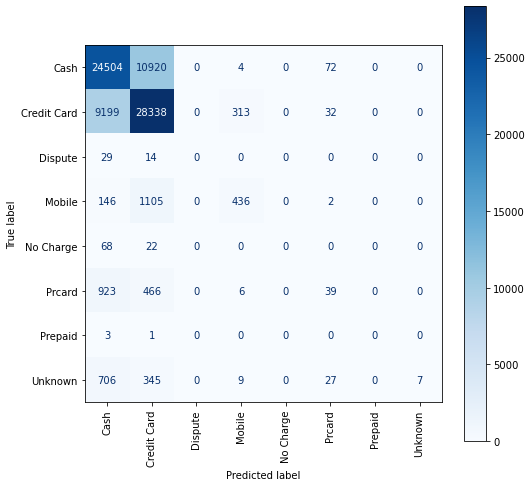

Wall time: 5min 48s


In [186]:
%%time

st_clf = StackingClassifier(estimators=[('rf', rf), ('xgb', model), ('lr', lr)],final_estimator=LogisticRegression(max_iter=2000))

st_clf.fit(X_train, y_train)
y_proba_st = st_clf.predict_proba(X_test)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(st_clf, X_test, y_test, cmap=plt.cm.Blues,xticks_rotation='vertical', ax=ax)
plt.show()

In [187]:
st_scores = cross_val_score(st_clf, X_train, y_train)
print(st_clf.__class__.__name__, 'mean: ', st_scores.mean(), 'std: ', st_scores.std())

StackingClassifier mean:  0.6884500127707198 std:  0.001846047153892245


The model improved a bit.